In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers.collection_of_experiments import CollectionOfExperiments
from helpers.plot_helpers import *
from helpers.computational_tools import remesh, select_LatLon, Lk_error, x_coord, y_coord, gaussian_remesh
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean
import os
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
import hvplot.xarray
import hvplot
hvplot.output(widget_location='bottom')

In [2]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')

In [3]:
directory = "/scratch/pp2681/mom6/Apr2023/R4-sensitivity"
for name in os.listdir(directory):
    ds += CollectionOfExperiments.init_folder(os.path.join(directory,name), additional_subfolder='output', prefix=name)

In [4]:
directory = "/scratch/pp2681/mom6/Apr2023/R4-selected"
for name in os.listdir(directory):
    ds += CollectionOfExperiments.init_folder(os.path.join(directory,name), additional_subfolder='output', prefix=name)

In [5]:
#ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/generalization', additional_subfolder='output')

In [6]:
directory = "/scratch/pp2681/mom6/Apr2023/generalization"
for name in os.listdir(directory):
    ds += CollectionOfExperiments.init_folder(os.path.join(directory,name), additional_subfolder='output', prefix=name)

In [7]:
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2023/GZ21_results', additional_subfolder='')

In [8]:
len(ds.exps)

1046

In [9]:
for exp in ds.exps:
    if 'GZ' in exp:
        print(exp)

GZ21-R4
GZ21-R5
GZ21-R6
GZ21-R7
GZ21-R8
R2_GZ-20YEAR_no_scaling
R3_GZ-20YEAR_no_scaling
R4_GZ-20YEAR
R4_GZ-20YEAR_no_scaling
R5_GZ-20YEAR
R5_GZ-20YEAR_no_scaling
R6_GZ-20YEAR
R6_GZ-20YEAR_no_scaling
R7_GZ-20YEAR
R7_GZ-20YEAR_no_scaling
R8_GZ-20YEAR
R8_GZ-20YEAR_no_scaling


In [10]:
for exp in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    ds.remesh('R64', exp)

Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2
Experiment R64 coarsegrained to R3 is created. Its identificator=R64_R3
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4
Experiment R64 coarsegrained to R5 is created. Its identificator=R64_R5
Experiment R64 coarsegrained to R6 is created. Its identificator=R64_R6
Experiment R64 coarsegrained to R7 is created. Its identificator=R64_R7
Experiment R64 coarsegrained to R8 is created. Its identificator=R64_R8


# Filtering experiment

In [29]:
FGR=1

from dask.diagnostics import ProgressBar
with ProgressBar():
    ds.remesh('R64', 'R4', f'R64_R4_FGR{FGR}', operator= lambda x,y: gaussian_remesh(x,y,FGR=FGR), compute=True)

[########################################] | 100% Completed | 52.98 s
[########################################] | 100% Completed | 49.78 s
[########################################] | 100% Completed | 75.51 s
[########################################] | 100% Completed | 94.29 s
[########################################] | 100% Completed | 51.38 s
[########################################] | 100% Completed | 50.58 s
[########################################] | 100% Completed | 75.47 s
[########################################] | 100% Completed | 94.85 s
[########################################] | 100% Completed | 52.35 s
[########################################] | 100% Completed | 90.13 s
[########################################] | 100% Completed | 51.31 s
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4_FGR1


In [30]:
with ProgressBar():
    ds[f'R64_R4_FGR{FGR}'].SGS_transfer

[########################################] | 100% Completed | 202.10 s
[########################################] | 100% Completed | 197.14 s
[########################################] | 100% Completed | 205.77 s
[########################################] | 100% Completed | 206.62 s
[########################################] | 100% Completed | 2.52 sms
[########################################] | 100% Completed | 415.28 ms
[########################################] | 100% Completed | 411.14 ms
[########################################] | 100% Completed | 4.95 ss
[########################################] | 100% Completed | 4.61 sms


In [31]:
dataset = xr.Dataset()
for key in ['u', 'v', 'e', 'h', 'RV', 'RV_f', 'PV', 'SGSx', 'SGSy']:
    dataset[key] = ds[f'R64_R4_FGR{FGR}'].__getattribute__(key)
dataset.to_netcdf(f'/scratch/pp2681/mom6/R64_R4_FGR{FGR}-part1.nc')

In [32]:
dataset = xr.Dataset()
for key in ['ua', 'va', 'ea', 'ha']:
    dataset[key] = ds[f'R64_R4_FGR{FGR}'].__getattribute__(key)
dataset.to_netcdf(f'/scratch/pp2681/mom6/R64_R4_FGR{FGR}-part2.nc')

# Reading filtered experiment

In [11]:
FGR=2.5
ds.remesh('R64', 'R4', f'R64_R4_FGR{FGR}', operator= lambda x,y: gaussian_remesh(x,y,FGR=FGR))
for file in [f'/scratch/pp2681/mom6/R64_R4_FGR{FGR}-part1.nc', f'/scratch/pp2681/mom6/R64_R4_FGR{FGR}-part2.nc']:
    dataset = xr.open_dataset(file, decode_times=False)
    for key in dataset.keys():
        setattr(ds[f'R64_R4_FGR{FGR}'], key, dataset[key])

Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4_FGR2.5


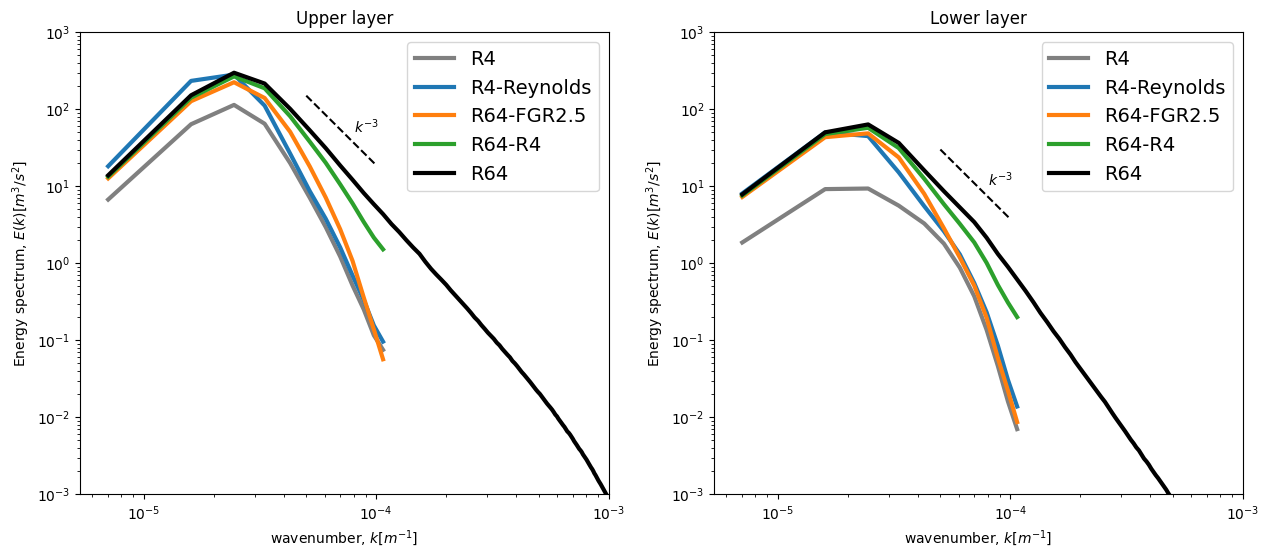

In [19]:
ds.plot_KE_spectrum(['R4', 'ZB-Reynolds-pass-4-pass-4-Cs-0.06-ZB-2.2', 'R64_R4_FGR2.5', 'R64_R4', 'R64'], labels=['R4', 'R4-Reynolds', 'R64-FGR2.5', 'R64-R4', 'R64']*5)

# Figure first. Grid convergence and domain.

Cannot set letter a
Colorbar-like object skipped


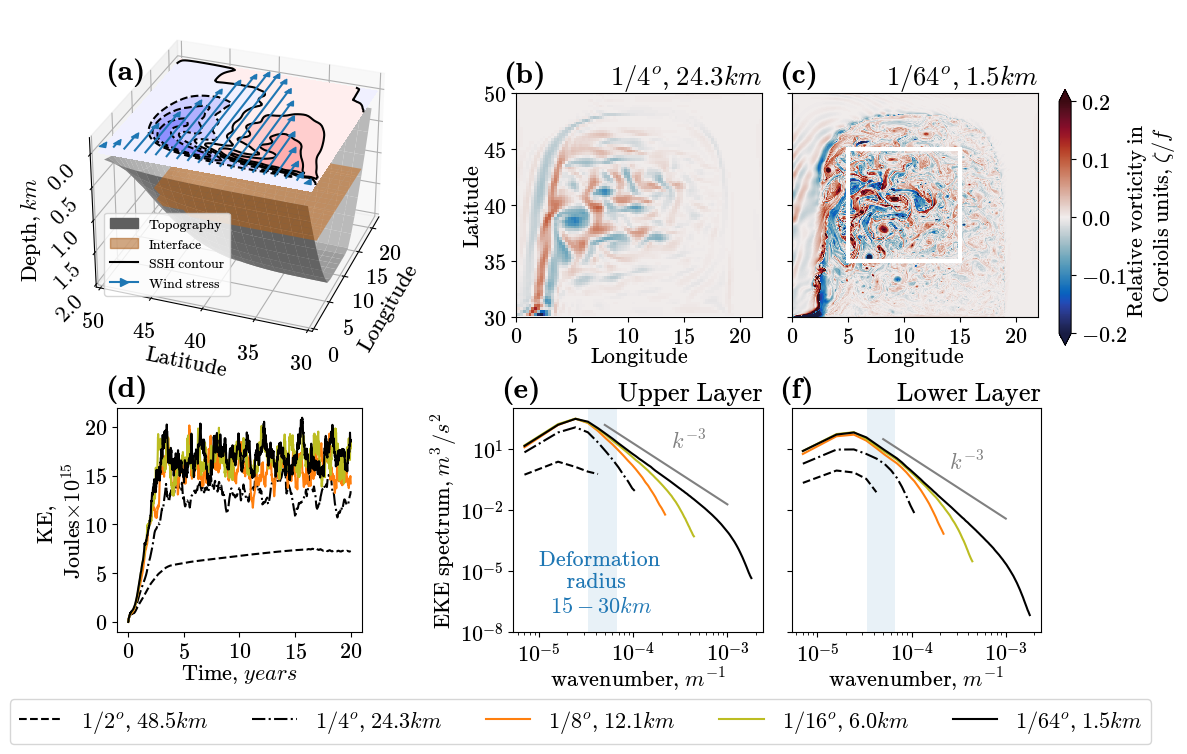

In [15]:
default_rcParams({'font.size': 16,'axes.formatter.limits': (-2,4), 'figure.subplot.wspace': 0.4, 'figure.subplot.hspace': 0.4})
from matplotlib.patches import Rectangle
fig = plt.figure(figsize=(12,7))
exps =['R2', 'R4', 'R8', 'R16', 'R64']
labels=['$1/2^o$, $48.5km$', '$1/4^o$, $24.3km$', '$1/8^o$, $12.1km$', '$1/16^o$, $6.0km$', '$1/64^o$, $1.5km$']
colors = ['k', 'k', 'tab:orange', 'tab:olive', 'k']
lss = ['--', '-.', '-', '-', '-']
def plot_spectrum(zl=0):
    for exp,label,color,ls in zip(exps,labels,colors,lss):
        ds[exp].EKE_spectrum.isel(zl=zl).plot(label=label,color=color,ls=ls)
    plt.xlabel(r'wavenumber, $m^{-1}$')
    plt.ylabel('EKE spectrum, $m^3/s^2$')
    if zl==0:
        k = [5e-5, 1e-3]
        E = [1.5e+2, 0]
        plt.text(2.5e-4,1e+1,'$k^{-3}$',color='gray')
    else:
        k = [5e-5, 1e-3]
        E = [3e+1, 0]
        plt.text(2.5e-4,1e0,'$k^{-3}$',color='gray')
    E[1] = E[0] * (k[1]/k[0])**(-3)
    plt.loglog(k,E,ls='-', color='gray')
    plt.title('')
    plt.ylim([1e-8,1e+3])
    
def plot_vorticity(exp):
    field = ds[exp].RV_f.isel(zl=0,Time=-1)
    if exp=='R64':
        field = field.coarsen(xq=2,yq=2,boundary='trim').mean().compute()
    im = field.plot.imshow(vmin=-0.2, vmax=0.2, cmap=cmocean.cm.balance, add_colorbar=False, interpolation='none')
    plt.xticks([0,5,10,15,20])
    plt.yticks([30,35,40,45,50])
    plt.xlim([0,22])
    plt.ylim([30,50])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('')
    plt.gca().set_aspect(1)
    return im

#ax = fig.add_subplot(2,3,1,projection='3d')
ax = fig.add_axes([0.0, 0.5, 0.45, 0.5], projection='3d')
ds.plot_domain(ax)
#plt.title('Double Gyre \nconfiguration')

#ax = fig.add_subplot(2,3,2); plt.sca(ax)
ax = fig.add_axes([0.4, 0.56, 0.32, 0.32]); plt.sca(ax)
plot_vorticity('R4')
plt.title(labels[1],loc='right')

#ax = fig.add_subplot(2,3,3); plt.sca(ax)
ax = fig.add_axes([0.63, 0.56, 0.32, 0.32]); plt.sca(ax)
im = plot_vorticity('R64')
plt.ylabel('')
plt.yticks([30,35,40,45,50], [None]*5)
plt.title(labels[-1],loc='right')
rect = Rectangle((5, 35), 10, 10, linewidth=3, edgecolor='white', facecolor='none')
ax.add_patch(rect)

cax = fig.add_axes([0.91, 0.52, 0.01, 0.365])
plt.colorbar(im, cax=cax, extend='both', label='Relative vorticity in \n Coriolis units, $\zeta/f$')

ax = fig.add_subplot(2,3,4); plt.sca(ax)
for exp,label,color,ls in zip(exps,labels,colors,lss):
    En = (1e-15*ds[exp].series.KE.sum(dim='Layer'))
    En['Time'] = En['Time'] / 365
    En.plot(label=label, color=color,ls=ls)
plt.ylabel('KE, \nJoules$\\times10^{15}$')
plt.xlabel('Time, $years$')
plt.xticks([0,5,10,15,20])

#ax = fig.add_subplot(2,3,5)
ax = fig.add_axes([0.455, 0.11, 0.208, 0.32]); plt.sca(ax)
plot_spectrum(zl=0)
# Baroclinic deformation radius
Rd1 = 30000
Rd2 = 15000
plt.axvspan(1/Rd1, 1/Rd2, color='tab:blue', alpha=0.1, lw=0)
plt.text(1e-5,1e-7,'Deformation \n     radius \n  $15-30km$', fontsize=16, color='tab:blue')
plt.title('Upper Layer', loc='right')
plt.legend(ncol=5, bbox_to_anchor=(2.6,-0.25))

#ax = fig.add_subplot(2,3,6)
ax = fig.add_axes([0.687, 0.11, 0.208, 0.32]); plt.sca(ax)
plot_spectrum(zl=1)
plt.axvspan(1/Rd1, 1/Rd2, color='tab:blue', alpha=0.1, lw=0)
plt.title('Lower Layer', loc='right')
plt.ylabel('')
plt.yticks([1e-8, 1e-5, 1e-2, 1e+1], [None]*4)

set_letters(x=-0.05, y=1.05, fontsize=20, letters=['a', 'b', 'c', 'd', 'e', 'f'])
fig.text(0.115,0.9,'(a)', fontweight='bold',fontsize=20);
plt.savefig('Paper-Figures/DoubleGyre-update-gray.pdf')

In [18]:
ds['R4'].vert_grid.R.load()

<xarray.DataArray 'R' (zl: 2)>
array([1035.   , 1036.035])
Coordinates:
  * zl       (zl) float64 1.035e+03 1.036e+03
Attributes:
    long_name:  Target Potential Density
    units:      kilogram meter-3

In [19]:
ds['R4'].vert_grid.g.load()

<xarray.DataArray 'g' (zl: 2)>
array([0.98  , 0.0098])
Coordinates:
  * zl       (zl) float64 1.035e+03 1.036e+03
Attributes:
    long_name:  Reduced gravity
    units:      meter second-2

In [21]:
(1036.035-1035.)/1035.*9.8

0.009800000000000777

# Determination of the range of deformation radius scales

Text(0.5, 1.0, '')

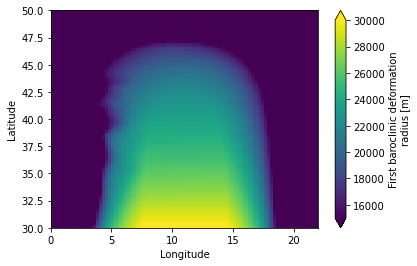

In [31]:
ds['R4-JH'].energy.Rd1.isel(Time=-1).plot(vmin=15000,vmax=30000)
plt.title('')

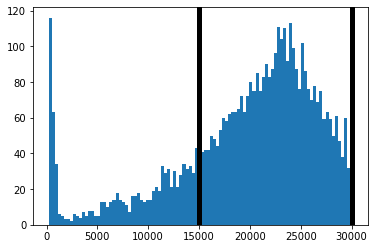

In [32]:
y = ds['R4-JH'].energy.Rd1.isel(Time=-1).values.ravel()
yy = y[y>0]
plt.hist(yy,100);
plt.axvline(x=15000,color='k',lw=5)
plt.axvline(x=30000,color='k',lw=5)

# Velocity scale

In [15]:
v = ds['R64'].velocity.isel(Time=-1)

In [17]:
mask = ds['R64'].h.isel(zl=1, Time=-1)>1e-3

In [26]:
np.sqrt((v**2).mean(dim=('xh','yh'))).values

array([0.08956065, 0.03502617], dtype=float32)

# Defining main models for comparison

In [12]:
coarse = 'R4'
hires = 'R64'
hires_bar = 'R64_R4'
ZB = 'ZB-clean-Cs-0.06-ZB-0.5'
JansenHeld = 'Jansen-Held-R4-ref';
ZB_smooth = 'ZB-stress-pass-4-sel-1-Cs-0.06-ZB-1.0'
ZB_reynolds = 'ZB-Reynolds-pass-4-pass-4-Cs-0.06-ZB-2.0'
GZ = 'R4_GZ-20YEAR'

In [13]:
labeling = {
'coarse': '$1/4^o$',
'hires': '$1/64^o$',
'hires_bar': '$1/64^o$-Coarse',
'ZB': '$1/4^o$, ZB20',
'JansenHeld': '$1/4^o$, JH15',
'ZB_smooth': '$1/4^o$, ZB20-Smooth',
'ZB_reynolds': '$1/4^o$, ZB20-Reynolds',
'GZ': '$1/4^o$, GZ21'
}

In [14]:
yellow = [0.9290, 0.6940, 0.1250]
violet = [0.4940, 0.1840, 0.5560]
lightblue = [0.3010, 0.7450, 0.9330]

# Influence of trace part

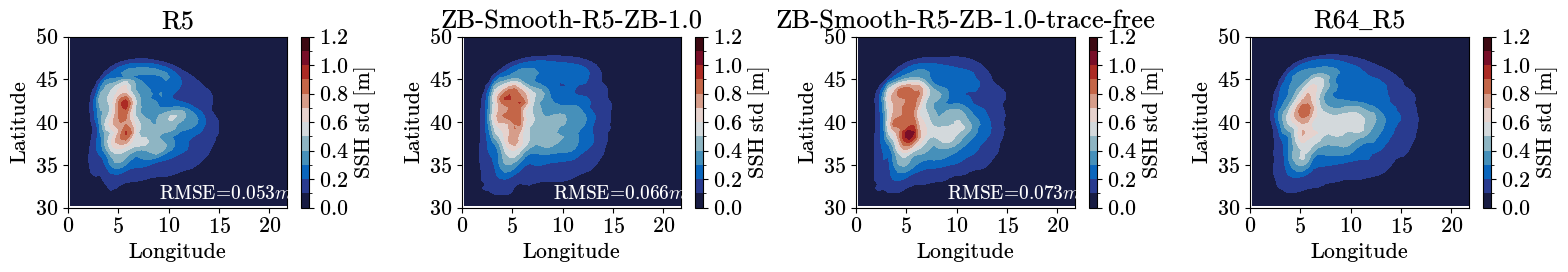

In [24]:
ds.plot_ssh_std(['R5', 'ZB-Smooth-R5-ZB-1.0', 'ZB-Smooth-R5-ZB-1.0-trace-free', 'R64_R5'])

# Figure second. KE spectrum

In [35]:
exps = [ JansenHeld, GZ, ZB, ZB_smooth, ZB_reynolds, coarse, hires]
labels = [labeling[key] for key in ['JansenHeld', 'GZ', 'ZB', 'ZB_smooth', 'ZB_reynolds', 'coarse', 'hires']]
colors = ['tab:red', 'tab:green', 'tab:blue', yellow, violet, 'k', 'k']
lws = [2.0]*5 + [1.5, 1.5]
lss = [ '--', '-.', '-', '-', '-', '-.', '-']
zorders = [None]*6 + [-1]

In [36]:
def plot_spectrum(zl=0):
    for exp,label,color,lw,ls,zorder in zip(exps,labels,colors,lws,lss,zorders):
        ds[exp].EKE_spectrum.isel(zl=zl).plot(label=label,color=color,lw=lw,ls=ls,zorder=zorder)
    plt.xlabel(r'wavenumber, $m^{-1}$')
    plt.ylabel('EKE spectrum, $m^3/s^2$')
    if zl==0:
        k = [5e-5, 5e-4]
        E = [1.5e+2, 0]
        plt.text(1.5e-4,2e+1,'$k^{-3}$',color='gray')
    else:
        k = [5e-5, 5e-4]
        E = [3e+1, 0]
        plt.text(1.5e-4,2e0,'$k^{-3}$',color='gray')
    E[1] = E[0] * (k[1]/k[0])**(-3)
    plt.loglog(k,E,ls='-',color='gray')
    plt.title('')
    plt.ylim([1e-5,1e+3])
    plt.xlim([None,1e-3])

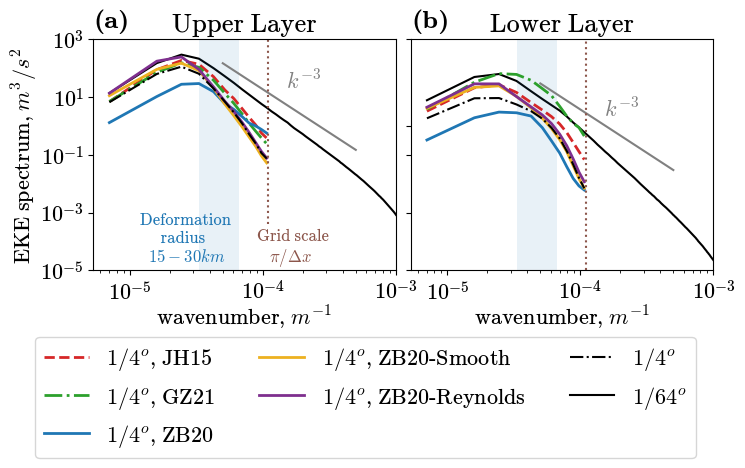

In [37]:
default_rcParams({'font.size': 16, 'figure.subplot.wspace': 0.05})
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_spectrum()
plt.title('Upper Layer')
plt.legend(ncol=3, bbox_to_anchor=(0.9,-0.55), loc='center')
# Baroclinic deformation radius
Rd1 = 30000
Rd2 = 15000
plt.axvspan(1/Rd1, 1/Rd2, color='tab:blue', alpha=0.1, lw=0)
plt.text(1.2e-5,2e-5,'Deformation \n     radius \n  $15-30km$', fontsize=12, color='tab:blue')
plt.axvline(x=1.1e-4, ls=':', color='tab:brown', ymin=0.2)
plt.text(0.9e-4, 0.2e-4, 'Grid scale\n   $\\pi/\\Delta x$', fontsize=12, color='tab:brown')
plt.subplot(1,2,2)
plot_spectrum(zl=1)
plt.title('Lower Layer')
set_letters(y = 1.05, x=0, fontsize=18)
plt.axvspan(1/Rd1, 1/Rd2, color='tab:blue', alpha=0.1, lw=0)
plt.axvline(x=1.1e-4, ls=':', color='tab:brown', ymin=0.0)
plt.ylabel('')
plt.yticks([1e-5, 1e-3, 1e-1, 1e0, 1e+3], [None]*5);
plt.savefig('Paper-Figures/Spectrum-GZ-20.pdf')

# Figure 3. Offline vs Online transfer and power spectrum.

# Pure transfer spectrum

In [38]:
ref = ds['R64_R4_FGR2.5']
SGS = ref.SGS_transfer
ZB_offline = ref.transfer(*ref.ZB_offline(amplitude=0.5)).compute()
ZB_smooth_offline = ref.transfer(*ref.ZB_offline(amplitude=1.0, Stress_iter=4)).compute()
ZB_reynolds_offline = ref.transfer(*ref.ZB_offline(amplitude=2.0, Stress_iter=4, HPF_iter=4)).compute()

In [39]:
gz = xr.concat([xr.open_dataset('/scratch/pp2681/mom6/Apr2023/GZ_offline/GZ21_zl0.nc',
                decode_times=False), xr.open_dataset('/scratch/pp2681/mom6/Apr2023/GZ_offline/GZ21_zl1.nc',
                decode_times=False)], 'zl').rename({'time': 'Time'})
scaling = 0.7827
GZ_offline = ref.transfer(scaling * gz.S_x, scaling * gz.S_y).compute()

In [40]:
Smagorinsky_offline = ref.transfer(*ref.Smagorinsky(Cs=0.06)).compute()

In [41]:
def compensated(sp):
    return sp * sp.freq_r

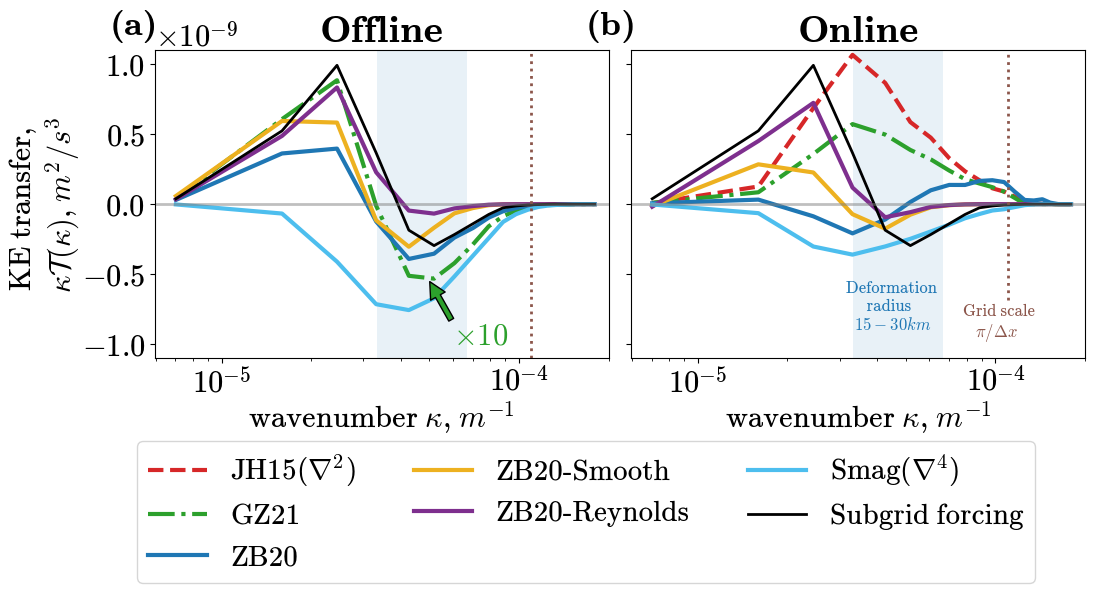

In [42]:
labels = ['ZB20', 'ZB20-Smooth', 'ZB20-Reynolds']
colors = ['tab:blue', yellow, violet]

default_rcParams({'font.size':22, 'figure.subplot.wspace': 0.05})
zl=0
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
compensated(GZ_offline*10).isel(zl=zl).plot(lw=3, color='tab:green', ls='-.')
compensated(ZB_offline).isel(zl=zl).plot(lw=3, color=colors[0])
compensated(ZB_smooth_offline).isel(zl=zl).plot(lw=3, color=colors[1])
compensated(ZB_reynolds_offline).isel(zl=zl).plot(lw=3, color=colors[2])
compensated(Smagorinsky_offline).isel(zl=zl).plot(lw=3, color=lightblue)
compensated(SGS).isel(zl=zl).plot(color='k', lw=2)
plt.axhline(y=0,color='gray', alpha=0.5, lw=2)
plt.xlabel('wavenumber $\kappa$, $m^{-1}$')
plt.ylabel('KE transfer, \n$\kappa \mathcal{T}(\kappa)$, $m^2/s^3$')
plt.title('Offline', fontweight='bold', y=1.)
Rd1 = 30000
Rd2 = 15000
plt.axvspan(1/Rd1, 1/Rd2, color='tab:blue', alpha=0.1, lw=0)
plt.ylim([-1.1e-9,1.1e-9])
plt.yticks(np.linspace(-1e-9,1e-9,5))
plt.xscale('log')
plt.axvline(x=1.1e-4, ls=':', color='tab:brown', lw=2)
plt.xlim([None, 2e-4])

plt.gca().annotate('$\\times 10$', color='tab:green', xy=(5e-5, -0.55e-9), xytext=(6e-5,-1e-9),
                arrowprops=dict(facecolor='tab:green', shrink=0.01))

plt.subplot(1,2,2)
lss = ['-','-','-']
compensated(ds['Jansen-Held-R4-backscatter-data-ref'].JH_transfer).isel(zl=zl).plot(lw=3, label='JH15($\\nabla^2$)', color='tab:red', ls='--')
compensated(ds[GZ].GZ_transfer).isel(zl=zl).plot(lw=3, label='GZ21', color='tab:green', ls='-.')
for exp,label,color,ls in zip([ZB, ZB_smooth, ZB_reynolds],labels,colors,lss):
    compensated(ds[exp].ZB_transfer).isel(zl=zl).plot(lw=3, label=label,color=color,ls=ls)
compensated(ds['R4'].Model_transfer).isel(zl=zl).plot(lw=3, label='Smag($\\nabla^4$)', color=lightblue)
compensated(SGS).isel(zl=zl).plot(color='k', lw=2, label='Subgrid forcing')
plt.axhline(y=0,color='gray', alpha=0.5, lw=2)
plt.xlabel('wavenumber $\kappa$, $m^{-1}$')
plt.ylim([-1.1e-9,1.1e-9])
plt.yticks(np.linspace(-1e-9,1e-9,5), [None]*5)
plt.xscale('log')
plt.xlim([None, 2e-4])
plt.title('Online', fontweight='bold', y=1.)
plt.legend(bbox_to_anchor=(-0.1,-0.5), loc='center', ncol=3, fontsize=21)
plt.axvspan(1/Rd1, 1/Rd2, color='tab:blue', alpha=0.1, lw=0)
plt.text(3.15e-5,-0.9e-9,'Deformation \n     radius \n  $15-30km$', fontsize=12, color='tab:blue')
plt.axvline(x=1.1e-4, ls=':', color='tab:brown', ymin=0.19, lw=2)
plt.text(0.78e-4, -0.95e-9, 'Grid scale\n   $\\pi/\\Delta x$', fontsize=12, color='tab:brown')

set_letters(fontsize=24, x=-0.1)

plt.savefig('Paper-Figures/SGS_spectrum-GZ-20.pdf')

# Additional cospectrum figures

In [20]:
ref = ds['R64_R4_FGR2.5']
SGS = ref.SGS_transfer
ZB_offline = ref.transfer(*ref.ZB_offline(amplitude=0.5)).compute()
ZB_smooth_offline = ref.transfer(*ref.ZB_offline(amplitude=1.0, Stress_iter=4)).compute()
ZB_reynolds_offline = ref.transfer(*ref.ZB_offline(amplitude=2.0, Stress_iter=4, HPF_iter=4)).compute()

In [21]:
gz = xr.concat([xr.open_dataset('/scratch/pp2681/mom6/Apr2023/GZ_offline/GZ21_zl0.nc',
                decode_times=False), xr.open_dataset('/scratch/pp2681/mom6/Apr2023/GZ_offline/GZ21_zl1.nc',
                decode_times=False)], 'zl').rename({'time': 'Time'})
scaling = 0.7827
GZ_offline = ref.transfer(scaling * gz.S_x, scaling * gz.S_y).compute()

In [22]:
Smagorinsky_offline = ref.transfer(*ref.Smagorinsky(Cs=0.06)).compute()

In [23]:
def compensated(sp):
    return sp * sp.freq_r

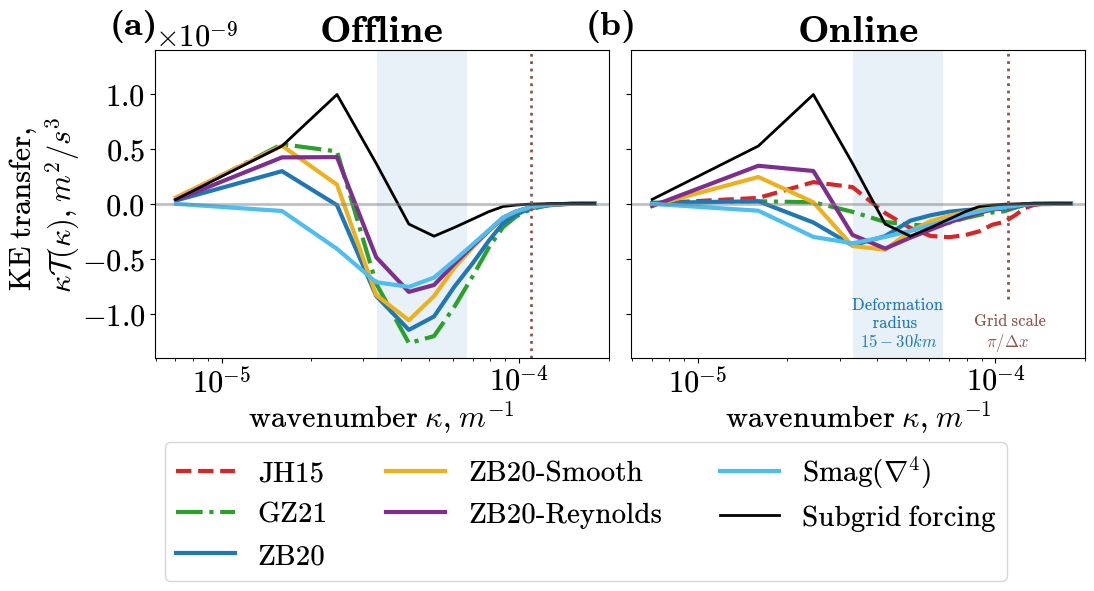

In [50]:
labels = ['ZB20', 'ZB20-Smooth', 'ZB20-Reynolds']
colors = ['tab:blue', yellow, violet]

default_rcParams({'font.size':22, 'figure.subplot.wspace': 0.05})
zl=0
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
compensated(GZ_offline*10 + Smagorinsky_offline).isel(zl=zl).plot(lw=3, color='tab:green', ls='-.')
compensated(ZB_offline + Smagorinsky_offline).isel(zl=zl).plot(lw=3, color=colors[0])
compensated(ZB_smooth_offline + Smagorinsky_offline).isel(zl=zl).plot(lw=3, color=colors[1])
compensated(ZB_reynolds_offline + Smagorinsky_offline).isel(zl=zl).plot(lw=3, color=colors[2])
compensated(Smagorinsky_offline).isel(zl=zl).plot(lw=3, color=lightblue)
compensated(SGS).isel(zl=zl).plot(color='k', lw=2)
plt.axhline(y=0,color='gray', alpha=0.5, lw=2)
plt.xlabel('wavenumber $\kappa$, $m^{-1}$')
plt.ylabel('KE transfer, \n$\kappa \mathcal{T}(\kappa)$, $m^2/s^3$')
plt.title('Offline', fontweight='bold', y=1.)
Rd1 = 30000
Rd2 = 15000
plt.axvspan(1/Rd1, 1/Rd2, color='tab:blue', alpha=0.1, lw=0)
plt.ylim([-1.4e-9,1.4e-9])
plt.yticks(np.linspace(-1e-9,1e-9,5))
plt.xscale('log')
plt.axvline(x=1.1e-4, ls=':', color='tab:brown', lw=2)
plt.xlim([None, 2e-4])

plt.subplot(1,2,2)
lss = ['-','-','-']
compensated(ds['Jansen-Held-R4-backscatter-data-ref'].Model_transfer).isel(zl=zl).plot(lw=3, label='JH15', color='tab:red', ls='--')
compensated(ds[GZ].GZ_transfer + ds[GZ].Model_transfer).isel(zl=zl).plot(lw=3, label='GZ21', color='tab:green', ls='-.')
for exp,label,color,ls in zip([ZB, ZB_smooth, ZB_reynolds],labels,colors,lss):
    compensated(ds[exp].Model_transfer).isel(zl=zl).plot(lw=3, label=label,color=color,ls=ls)
compensated(ds['R4'].Model_transfer).isel(zl=zl).plot(lw=3, label='Smag($\\nabla^4$)', color=lightblue)
compensated(SGS).isel(zl=zl).plot(color='k', lw=2, label='Subgrid forcing')
plt.axhline(y=0,color='gray', alpha=0.5, lw=2)
plt.xlabel('wavenumber $\kappa$, $m^{-1}$')
plt.ylim([-1.4e-9,1.4e-9])
plt.yticks(np.linspace(-1e-9,1e-9,5), [None]*5)
plt.xscale('log')
plt.xlim([None, 2e-4])
plt.title('Online', fontweight='bold', y=1.)
plt.legend(bbox_to_anchor=(-0.1,-0.5), loc='center', ncol=3, fontsize=21)
plt.axvspan(1/Rd1, 1/Rd2, color='tab:blue', alpha=0.1, lw=0)
plt.text(3.3e-5,-1.3e-9,'Deformation \n     radius \n  $15-30km$', fontsize=12, color='tab:blue')
plt.axvline(x=1.1e-4, ls=':', color='tab:brown', ymin=0.19, lw=2)
plt.text(0.85e-4, -1.3e-9, 'Grid scale\n   $\\pi/\\Delta x$', fontsize=12, color='tab:brown')

set_letters(fontsize=24, x=-0.1)

plt.savefig('Review/Cospectrum-joint.pdf')

# Figure KE_PE

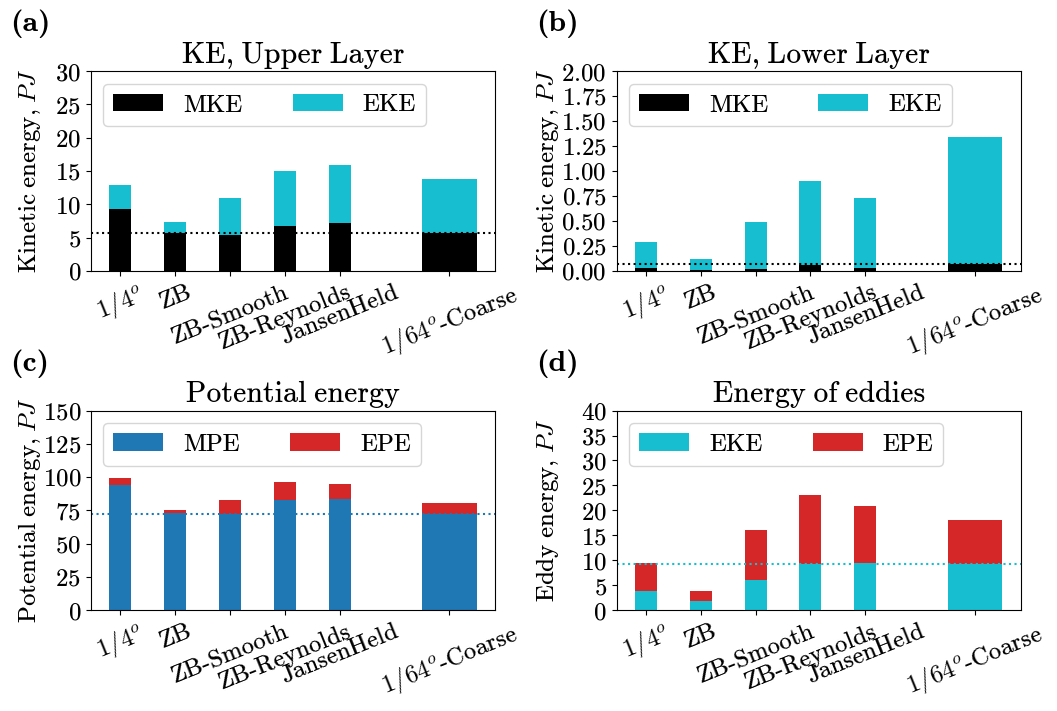

In [262]:
default_rcParams({'font.size':18})
ds.plot_KE_PE(exps, labels, rotation=22)
set_letters(y=1.2, fontsize=20)
plt.gcf().align_ylabels() 
plt.savefig('Paper-Figures/KE_PE.pdf')

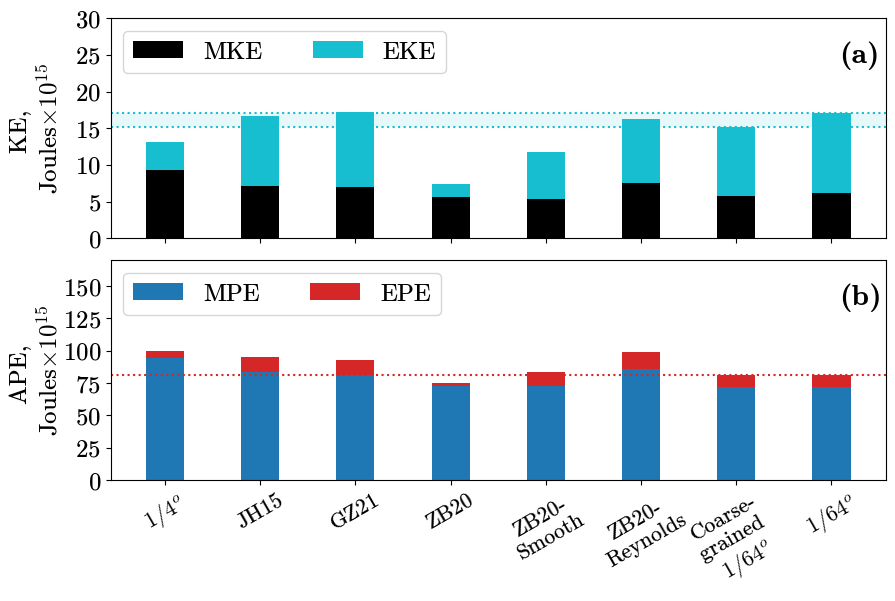

In [45]:
exps = [coarse, JansenHeld, GZ, ZB, ZB_smooth, ZB_reynolds, 'R64_R4', 'R64']
labels = ['$1/4^o$', 'JH15', 'GZ21', 'ZB20', 'ZB20-\nSmooth', 'ZB20-\nReynolds', 'Coarse-\ngrained \n$1/64^o$', '$1/64^o$']

default_rcParams({'font.size':18})
ds.plot_KE_PE_simpler(exps, labels, rotation=30)
set_letters(y=0.8, x=0.94, fontsize=20)
plt.gcf().align_ylabels() 

plt.savefig('Paper-Figures/KE_PE-GZ-20.pdf')

# Figure ssh

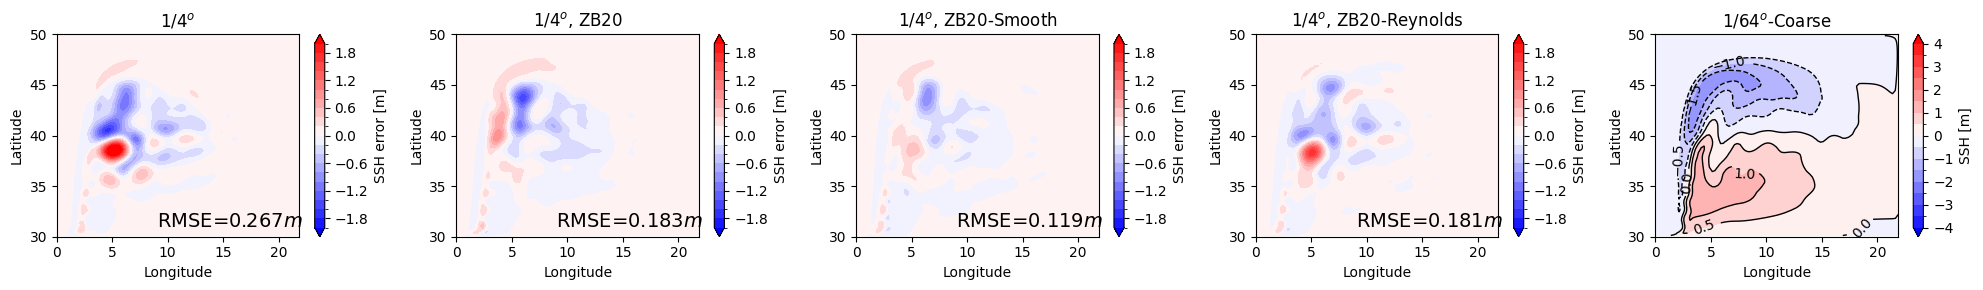

In [19]:
exps = [coarse, ZB, ZB_smooth, ZB_reynolds, hires_bar] 
labels = [labeling[key] for key in ['coarse', 'ZB', 'ZB_smooth', 'ZB_reynolds', 'hires_bar']]
ds.plot_ssh(exps,labels=labels, target='R64_R4')

In [20]:
def plot_ssh(exp, x=True, y=True, target='R64_R4'):
    ssh = ds[exp].ssh_mean
    print(float(ssh.min()), float(ssh.max()))
    levels = np.arange(-4,4.5,0.5)
    im = ssh.plot.contourf(levels=levels, cmap='bwr', linewidths=1, vmin=-4, vmax=4, add_colorbar=False)#, cbar_kwargs={'label': 'SSH, $m$', 'ticks': [-4,-3,-2,-1,0,1,2,3,4]})
    Cplot = ssh.plot.contour(levels=levels, colors='k', linewidths=1)
    plt.gca().clabel(Cplot, Cplot.levels)
    if x:
        plt.xticks((0, 5, 10, 15, 20))
        plt.xlabel('Longitude')
    else:
        plt.xticks([])
        plt.xlabel('')
        
    if y:
        plt.yticks((30, 35, 40, 45, 50))
        plt.ylabel('Latitude')
    else:
        plt.yticks([])
        plt.ylabel('')
    plt.title('')
    if exp != target:
        RMSE = Lk_error(ds[exp].ssh_mean,ds[target].ssh_mean)[0]
        plt.text(8.5,31,'RMSE='+"{:.3f}".format(RMSE)+'$m$', fontsize=13)
    
    plt.gca().set_aspect(1)
    
    return im
def plot_error(exp, target=hires_bar):
    ssh = ds[exp].ssh_mean
    ssh = ssh - remesh(ds[target].ssh_mean,ssh)
    print(float(ssh.min()), float(ssh.max()))
    levels = np.linspace(-3,3,31)
    ssh.plot.contourf(levels=levels, cmap='bwr', linewidths=1, vmin=-3, vmax=3, cbar_kwargs={'label': 'SSH error, $m$', 'ticks': [-3,-2,-1,0,1,2,3]})
    plt.xticks((0, 5, 10, 15, 20))
    plt.yticks((30, 35, 40, 45, 50))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('')

-1.9260118007659912 1.437463402748108
-2.3586008548736572 3.1677963733673096
-2.25085186958313 2.0608599185943604
-2.106016159057617 2.313742160797119
-2.3523244857788086 1.3881415128707886
-2.003835678100586 1.3600364923477173
-2.200723886489868 2.2309136390686035
Colorbar-like object skipped


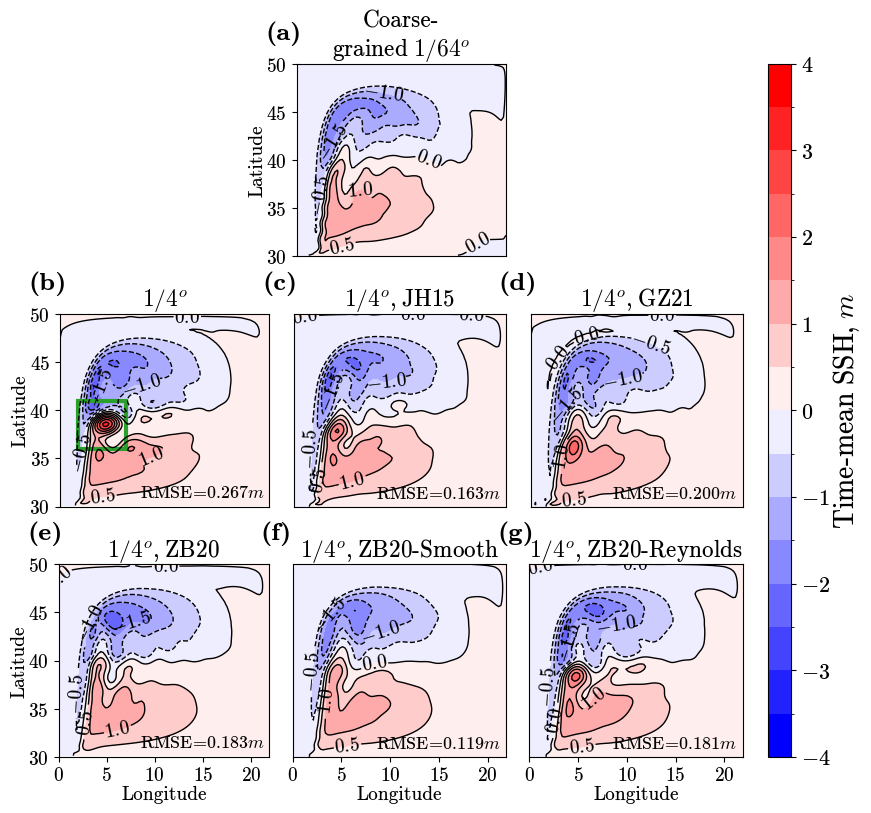

In [23]:
from matplotlib.patches import Rectangle
default_rcParams({'font.size': 14, 'figure.subplot.wspace': 0.05, 'figure.subplot.hspace': 0.3})
plt.figure(figsize = (11,9))

#target = 'R64_R4_FGR2.5'
target='R64_R4'
plt.subplot(3,3,2)
im=plot_ssh(target,x=False, target=target)
plt.title('Coarse-\ngrained $1/64^o$')

plt.subplot(3,3,4)
plot_ssh(coarse, x=False, target=target)
plt.title(labeling['coarse'])
rect = Rectangle((2, 36), 5, 5, linewidth=3, edgecolor='tab:green', facecolor='none')
plt.gca().add_patch(rect)

plt.subplot(3,3,5)
plot_ssh(JansenHeld,x=False,y=False, target=target)
plt.title(labeling['JansenHeld'])

plt.subplot(3,3,6)
plot_ssh(GZ,x=False,y=False, target=target)
plt.title(labeling['GZ'])

plt.subplot(3,3,7)
plot_ssh(ZB,  target=target)
plt.title(labeling['ZB'])

plt.subplot(3,3,8)
plot_ssh(ZB_smooth,y=False, target=target)
plt.title(labeling['ZB_smooth'])
plt.xlabel('Longitude')

plt.subplot(3,3,9)
plot_ssh(ZB_reynolds,y=False, target=target)
plt.title(labeling['ZB_reynolds'])
plt.xlabel('Longitude')

cb = plt.colorbar(im, ax=plt.gcf().axes, pad=0.03, aspect=30)
cb.ax.tick_params(labelsize=16)
cb.set_label(label='Time-mean SSH, $m$', fontsize=20)

set_letters(fontsize=18, y=1.13,x=-0.15)

plt.savefig('Paper-Figures/ssh-GZ-20.pdf')

# Following Greatbatch2010 (first paper, we superimpose u'u', u'v', v'v' on top of mean SSH)

In [25]:
S_11, S_12, S_22 = ds['R64_R4'].subgrid_momentum_flux

In [26]:
S12_mean = S_12.sel(Time=slice(365*5,None)).mean('Time').compute()

In [27]:
S11_mean = S_11.sel(Time=slice(365*5,None)).mean('Time').compute()

In [28]:
S22_mean = S_22.sel(Time=slice(365*5,None)).mean('Time').compute()

Text(0.5, 1.0, '')

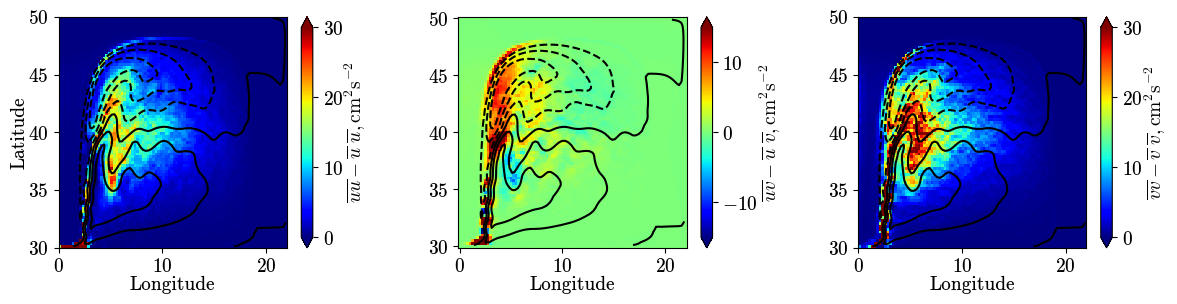

In [76]:
default_rcParams({'figure.subplot.wspace': 0.4})
plt.figure(figsize=(14,3))

plt.subplot(1,3,1)
(-1e+4*S11_mean.isel(zl=0)).plot(vmin=0, vmax=30, cmap='jet', cbar_kwargs={'label':'$\\overline{uu}-\\overline{u}~\\overline{u}, \mathrm{cm}^{2} \mathrm{s}^{-2}$'})
ds['R64_R4'].ssh_mean.plot.contour(colors='k', levels=np.arange(-5,5.5,0.5))
plt.title('')

plt.subplot(1,3,2)
(-1e+4*S12_mean.isel(zl=0)).plot(vmin=-15, vmax=15, cmap='jet',  cbar_kwargs={'label':'$\\overline{uv}-\\overline{u}~\\overline{v}, \mathrm{cm}^{2} \mathrm{s}^{-2}$'})
ds['R64_R4'].ssh_mean.plot.contour(colors='k', levels=np.arange(-5,5.5,0.5))
plt.ylabel('')
plt.title('')

plt.subplot(1,3,3)
(-1e+4*S22_mean.isel(zl=0)).plot(vmin=0, vmax=30, cmap='jet',  cbar_kwargs={'label':'$\\overline{vv}-\\overline{v}~\\overline{v}, \mathrm{cm}^{2} \mathrm{s}^{-2}$'})
ds['R64_R4'].ssh_mean.plot.contour(colors='k', levels=np.arange(-5,5.5,0.5))
plt.ylabel('')
plt.title('')


# Following Hughes and Ash 2001

In [126]:
accel_FGR0 = (1e+7*ds['R64_R4'].SGSx.sel(Time=slice(365*5,None)).mean('Time')).isel(zl=0).compute()

In [129]:
accel_FGR2_5 = (1e+7*ds['R64_R4_FGR2.5'].SGSx.sel(Time=slice(365*5,None)).mean('Time')).isel(zl=0).compute()

Text(0.5, 1.0, 'Coarsegrained and filtered')

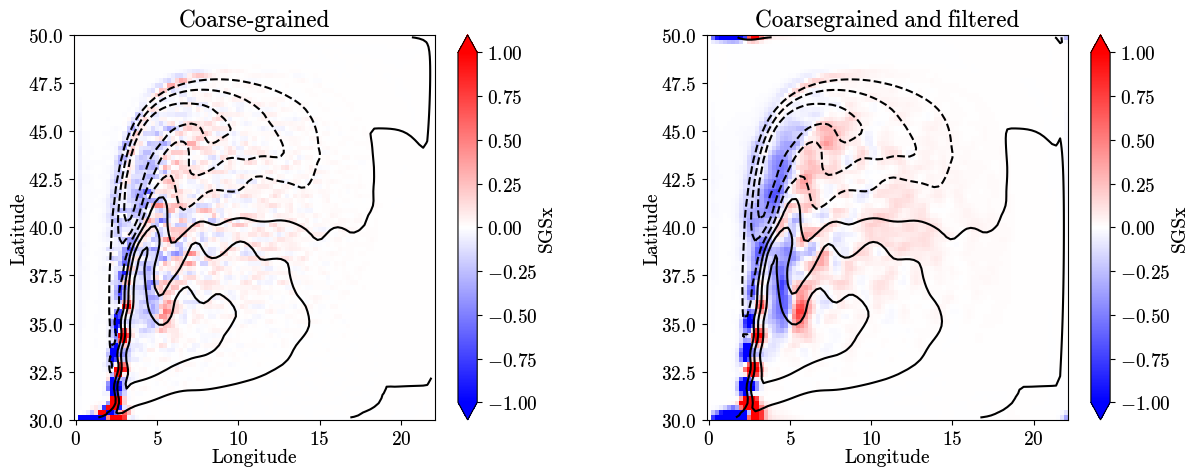

In [131]:
vv = 1
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
accel_FGR0.plot(vmin=-vv,vmax=vv,cmap='bwr')
ds['R64_R4'].ssh_mean.plot.contour(colors='k', levels=np.arange(-5,5.5,0.5))
plt.title('Coarse-grained')

plt.subplot(1,2,2)
accel_FGR2_5.plot(vmin=-vv,vmax=vv,cmap='bwr')
ds['R64_R4_FGR2.5'].ssh_mean.plot.contour(colors='k', levels=np.arange(-5,5.5,0.5))
plt.title('Coarsegrained and filtered')

# Similar plots for all models

In [24]:
def plot_accel(exp, x=True, y=True, vmax=1.5, zonal=True, zl=0, resolved='False'):
    accel = lambda x: 1e+7*x.sel(Time=slice(365*10,None)).mean('Time').isel(zl=zl).compute()
    
    if '_R' in exp:
        if zonal:
            field = ds[exp].SGSx
            field.loc[{'xq': slice(0,5), 'yh': slice(48,50)}] = 0.
        else:
            field = ds[exp].SGSy
            field.loc[{'xh': slice(0,5), 'yq': slice(48,50)}] = 0.
    elif 'GZ' in exp:
        if zonal:
            field = ds[exp].mom.CNNu+ds[exp].mom.diffu
        else:
            field = ds[exp].mom.CNNv+ds[exp].mom.diffv
    else:
        if zonal:
            field = ds[exp].mom.diffu
        else:
            field = ds[exp].mom.diffv
            
    if resolved == 'True':
        field = ds[exp].advection[0]
    elif resolved == 'joint':
        field = field + ds[exp].advection[0]
            
    acceleration = accel(field)
    
    print(float(acceleration.min()),float(acceleration.max()))
    im = acceleration.plot.imshow(vmin=-vmax, vmax=vmax, add_colorbar=False, cmap='seismic', interpolation='none')

    if x:
        plt.xticks((0, 5, 10, 15, 20))
        plt.xlabel('Longitude')
    else:
        plt.xticks([])
        plt.xlabel('')
        
    if y:
        plt.yticks((30, 35, 40, 45, 50))
        plt.ylabel('Latitude')
    else:
        plt.yticks([])
        plt.ylabel('')
    plt.title('')    
    plt.gca().set_aspect(1)
    
    return im

-8.378390357616551 4.449274736397129
-4.87225341796875 6.93408203125
-4.993709087371826 7.517899513244629
-8.812776565551758 8.217284202575684
-8.3770170211792 5.107608795166016
-7.559136867523193 2.3394572734832764
-10.127265930175781 3.883437156677246
Colorbar-like object skipped


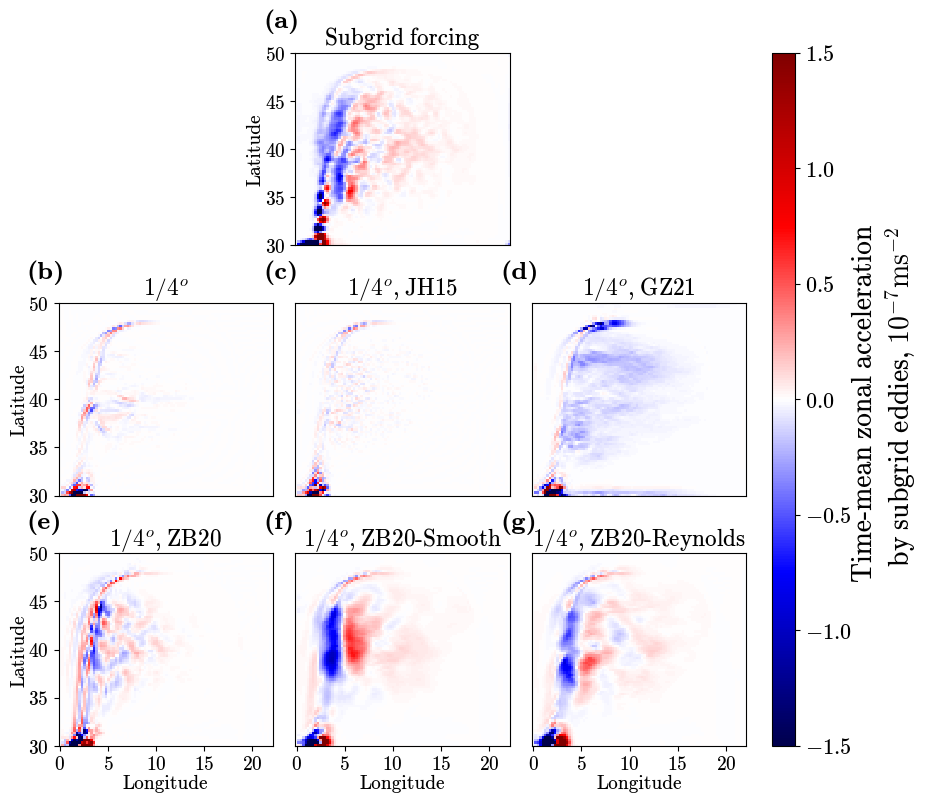

In [27]:
from matplotlib.patches import Rectangle
default_rcParams({'font.size': 14, 'figure.subplot.wspace': 0.05, 'figure.subplot.hspace': 0.3})
plt.figure(figsize = (11,9))

plt.subplot(3,3,2)
im=plot_accel('R64_R4_FGR2.5',x=False)
#plt.title('Filtered and \ncoarsegrained $1/64^o$')
plt.title('Subgrid forcing')

#plt.subplot(3,3,2)
#im=plot_accel('R64_R4',x=False, y=False)
#plt.title('coarsegrained $1/64^o$')

#plt.subplot(3,3,3)
#im=plot_accel('R64_R4_FGR2.5',x=False,y=False,resolved=True)
#plt.title('Resolved $1/64^o$')


plt.subplot(3,3,4)
plot_accel(coarse, x=False)
plt.title(labeling['coarse'])
rect = Rectangle((2, 36), 5, 5, linewidth=3, edgecolor='tab:green', facecolor='none')
#plt.gca().add_patch(rect)

plt.subplot(3,3,5)
plot_accel(JansenHeld,x=False,y=False)
plt.title(labeling['JansenHeld'])

plt.subplot(3,3,6)
plot_accel(GZ,x=False,y=False)
plt.title(labeling['GZ'])

plt.subplot(3,3,7)
plot_accel(ZB)
plt.title(labeling['ZB'])

plt.subplot(3,3,8)
plot_accel(ZB_smooth,y=False)
plt.title(labeling['ZB_smooth'])
plt.xlabel('Longitude')

plt.subplot(3,3,9)
plot_accel(ZB_reynolds,y=False)
plt.title(labeling['ZB_reynolds'])
plt.xlabel('Longitude')

cb = plt.colorbar(im, ax=plt.gcf().axes, pad=0.03, aspect=30)
cb.ax.tick_params(labelsize=16)
cb.set_label(label='Time-mean zonal acceleration \n by subgrid eddies, $10^{-7} \\mathrm{m}\\mathrm{s}^{-2}$', fontsize=20)#, labelpad=5)

set_letters(fontsize=18, y=1.13,x=-0.15)

plt.savefig('Paper-Figures/zonal-acceleration-20.pdf')

# It really accelerates at Lat>5 and decelerates at Lat<5

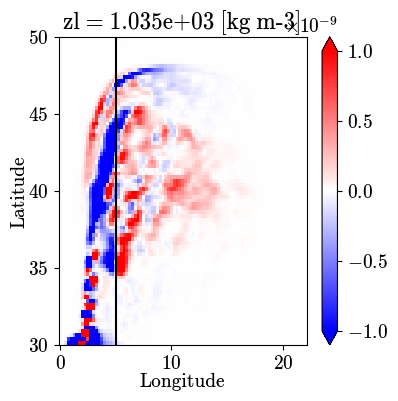

In [108]:
(ds['R64_R4_FGR2.5'].u_mean.isel(zl=0) * ds['R64_R4_FGR2.5'].SGSx.isel(zl=0).sel(Time=slice(365*5,None)).mean('Time')).plot(vmin=-1e-9, vmax=1e-9, cmap='bwr')
plt.axvline(x=5, color='k')

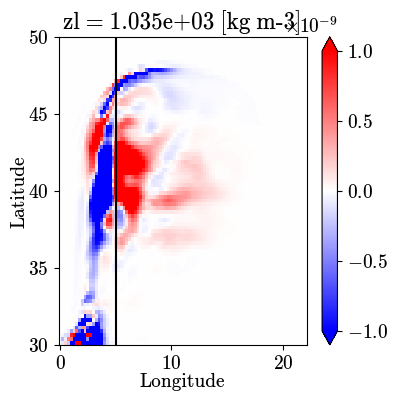

In [109]:
(ds[ZB_smooth].u_mean.isel(zl=0) * ds[ZB_smooth].mom.diffu.isel(zl=0).sel(Time=slice(365*5,None)).mean('Time')).plot(vmin=-1e-9, vmax=1e-9, cmap='bwr')
plt.axvline(x=5, color='k')

# Why RMSE is the same at 1/5^o degree

-8.378390357616551 4.449274736397129
-5.578332424163818 6.076389789581299
-7.5527496337890625 4.756382942199707
-9.28123664855957 4.7554850578308105
-10.223430633544922 4.156655311584473
-9.32981014251709 4.774638652801514
-10.86042594909668 5.667214870452881
Colorbar-like object skipped


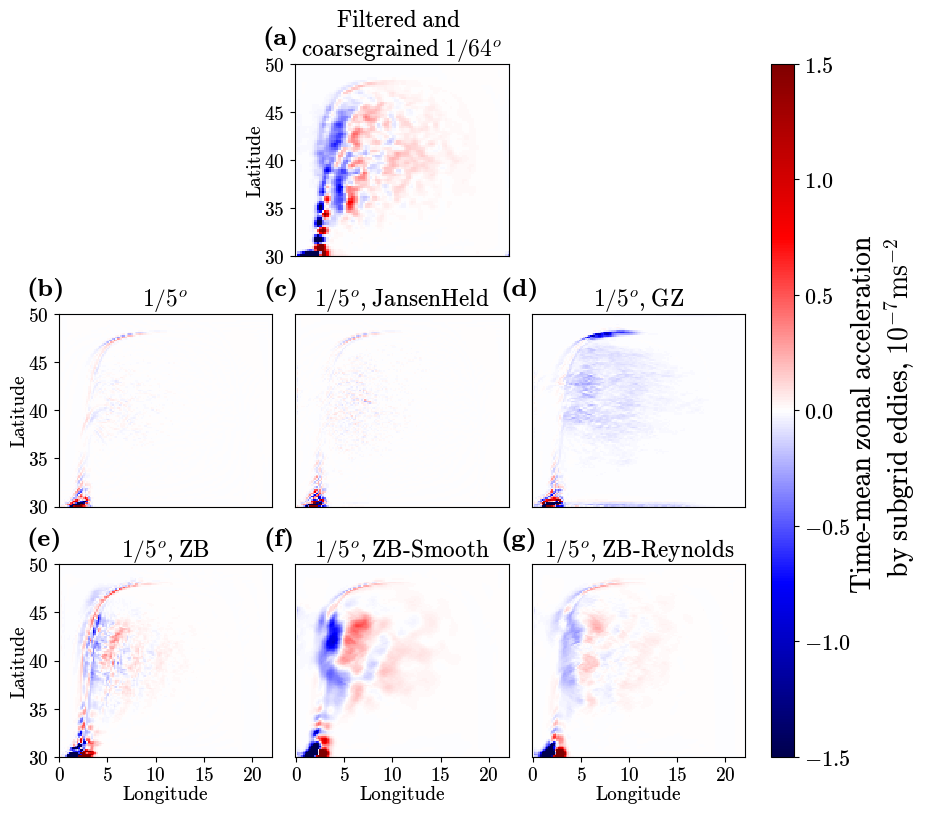

In [129]:
from matplotlib.patches import Rectangle
default_rcParams({'font.size': 14, 'figure.subplot.wspace': 0.05, 'figure.subplot.hspace': 0.3})
plt.figure(figsize = (11,9))

plt.subplot(3,3,2)
im=plot_accel('R64_R4_FGR2.5',x=False)
plt.title('Filtered and \ncoarsegrained $1/64^o$')

#plt.subplot(3,3,2)
#im=plot_accel('R64_R4',x=False, y=False)
#plt.title('coarsegrained $1/64^o$')

#plt.subplot(3,3,3)
#im=plot_accel('R64_R4_FGR2.5',x=False,y=False,resolved=True)
#plt.title('Resolved $1/64^o$')
RR = 'R6'

plt.subplot(3,3,4)
plot_accel(RR, x=False)
plt.title('$1/5^o$')
rect = Rectangle((2, 36), 5, 5, linewidth=3, edgecolor='tab:green', facecolor='none')
#plt.gca().add_patch(rect)

plt.subplot(3,3,5)
plot_accel(f'Jansen-Held-{RR}-ref',x=False,y=False)
plt.title('$1/5^o$, JansenHeld')

plt.subplot(3,3,6)
plot_accel(f'{RR}_GZ-20YEAR',x=False,y=False)
plt.title('$1/5^o$, GZ')

plt.subplot(3,3,7)
plot_accel(f'ZB-clean-{RR}-ZB-0.5')
plt.title('$1/5^o$, ZB')

plt.subplot(3,3,8)
plot_accel(f'ZB-Smooth-{RR}-ZB-1.0',y=False)
plt.title('$1/5^o$, ZB-Smooth')
plt.xlabel('Longitude')

plt.subplot(3,3,9)
plot_accel(f'ZB-Reynolds-{RR}-ZB-2.0',y=False)
plt.title('$1/5^o$, ZB-Reynolds')
plt.xlabel('Longitude')

cb = plt.colorbar(im, ax=plt.gcf().axes, pad=0.03, aspect=30)
cb.ax.tick_params(labelsize=16)
cb.set_label(label='Time-mean zonal acceleration \n by subgrid eddies, $10^{-7} \\mathrm{m}\\mathrm{s}^{-2}$', fontsize=20)#, labelpad=5)

set_letters(fontsize=18, y=1.1,x=-0.15)

-8.624232405522424 7.469789768134144
-20.1469036030618 10.253099690038805
-17.51838112551611 16.60729005020642
-27.26829829441799 11.264814938516276
-14.934666805107712 8.663898600472473
-14.61922171888294 8.426784794337777
-17.159370955557637 10.59984647645733
Colorbar-like object skipped


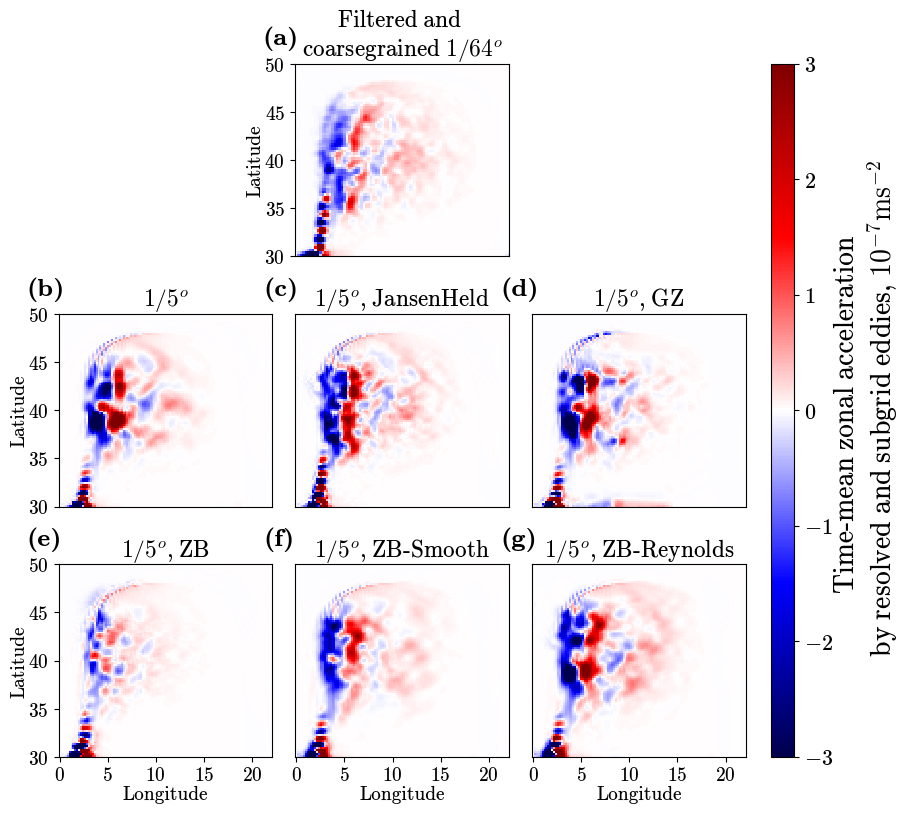

In [124]:
from matplotlib.patches import Rectangle
default_rcParams({'font.size': 14, 'figure.subplot.wspace': 0.05, 'figure.subplot.hspace': 0.3})
plt.figure(figsize = (11,9))

plt.subplot(3,3,2)
im=plot_accel('R64_R4_FGR2.5',x=False, resolved='joint', vmax=3)
plt.title('Filtered and \ncoarsegrained $1/64^o$')

#plt.subplot(3,3,2)
#im=plot_accel('R64_R4',x=False, y=False)
#plt.title('coarsegrained $1/64^o$')

#plt.subplot(3,3,3)
#im=plot_accel('R64_R4_FGR2.5',x=False,y=False,resolved=True)
#plt.title('Resolved $1/64^o$')


plt.subplot(3,3,4)
plot_accel('R5', x=False, resolved='joint', vmax=3)
plt.title('$1/5^o$')
rect = Rectangle((2, 36), 5, 5, linewidth=3, edgecolor='tab:green', facecolor='none')
#plt.gca().add_patch(rect)

plt.subplot(3,3,5)
plot_accel('Jansen-Held-R5-ref',x=False,y=False, resolved='joint', vmax=3)
plt.title('$1/5^o$, JansenHeld')

plt.subplot(3,3,6)
plot_accel('R5_GZ-20YEAR',x=False,y=False, resolved='joint', vmax=3)
plt.title('$1/5^o$, GZ')

plt.subplot(3,3,7)
plot_accel('ZB-clean-R5-ZB-0.5', resolved='joint', vmax=3)
plt.title('$1/5^o$, ZB')

plt.subplot(3,3,8)
plot_accel('ZB-Smooth-R5-ZB-1.0',y=False, resolved='joint', vmax=3)
plt.title('$1/5^o$, ZB-Smooth')
plt.xlabel('Longitude')

plt.subplot(3,3,9)
plot_accel('ZB-Reynolds-R5-ZB-2.0',y=False, resolved='joint', vmax=3)
plt.title('$1/5^o$, ZB-Reynolds')
plt.xlabel('Longitude')

cb = plt.colorbar(im, ax=plt.gcf().axes, pad=0.03, aspect=30)
cb.ax.tick_params(labelsize=16)
cb.set_label(label='Time-mean zonal acceleration \n by resolved and subgrid eddies, $10^{-7} \\mathrm{m}\\mathrm{s}^{-2}$', fontsize=20)#, labelpad=5)

set_letters(fontsize=18, y=1.1,x=-0.15)

-1.9228848218917847 1.4337186813354492
-2.3763628005981445 2.1969008445739746
-2.238273859024048 1.5916649103164673
-2.2470147609710693 1.7156860828399658
-2.2588133811950684 1.3963865041732788
-2.003309965133667 1.421545147895813
-2.224309206008911 1.5622823238372803
Colorbar-like object skipped


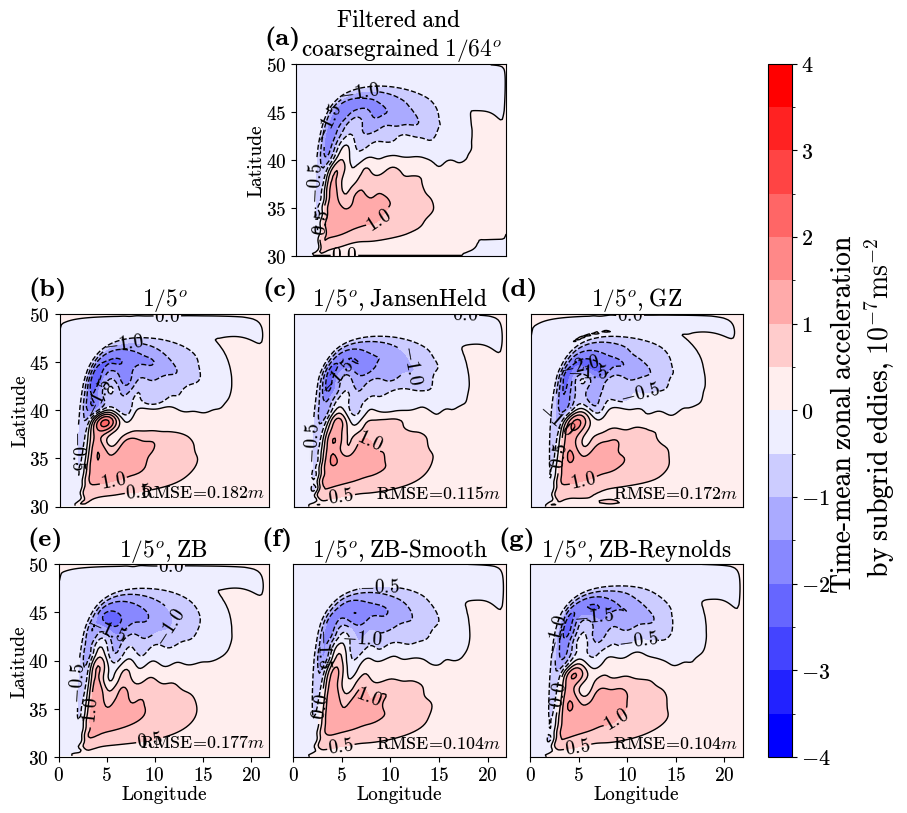

In [118]:
from matplotlib.patches import Rectangle
default_rcParams({'font.size': 14, 'figure.subplot.wspace': 0.05, 'figure.subplot.hspace': 0.3})
plt.figure(figsize = (11,9))


plt.subplot(3,3,2)
im=plot_ssh('R64_R5',x=False, target='R64_R5')
plt.title('Filtered and \ncoarsegrained $1/64^o$')

#plt.subplot(3,3,2)
#im=plot_accel('R64_R4',x=False, y=False)
#plt.title('coarsegrained $1/64^o$')

#plt.subplot(3,3,3)
#im=plot_accel('R64_R4_FGR2.5',x=False,y=False,resolved=True)
#plt.title('Resolved $1/64^o$')


plt.subplot(3,3,4)
plot_ssh('R5', x=False, target='R64_R5')
plt.title('$1/5^o$')
rect = Rectangle((2, 36), 5, 5, linewidth=3, edgecolor='tab:green', facecolor='none')
#plt.gca().add_patch(rect)

plt.subplot(3,3,5)
plot_ssh('Jansen-Held-R5-ref',x=False,y=False, target='R64_R5')
plt.title('$1/5^o$, JansenHeld')

plt.subplot(3,3,6)
plot_ssh('R5_GZ-20YEAR',x=False,y=False, target='R64_R5')
plt.title('$1/5^o$, GZ')

plt.subplot(3,3,7)
plot_ssh('ZB-clean-R5-ZB-0.5', target='R64_R5')
plt.title('$1/5^o$, ZB')

plt.subplot(3,3,8)
plot_ssh('ZB-Smooth-R5-ZB-1.0',y=False, target='R64_R5')
plt.title('$1/5^o$, ZB-Smooth')
plt.xlabel('Longitude')

plt.subplot(3,3,9)
plot_ssh('ZB-Reynolds-R5-ZB-2.0',y=False, target='R64_R5')
plt.title('$1/5^o$, ZB-Reynolds')
plt.xlabel('Longitude')

cb = plt.colorbar(im, ax=plt.gcf().axes, pad=0.03, aspect=30)
cb.ax.tick_params(labelsize=16)
cb.set_label(label='Time-mean zonal acceleration \n by subgrid eddies, $10^{-7} \\mathrm{m}\\mathrm{s}^{-2}$', fontsize=20)#, labelpad=5)

set_letters(fontsize=18, y=1.1,x=-0.15)


# Generalization

In [174]:
def error_total_energy(exp, target):
    return sum(ds[exp].Lk_error(ds[target], features=['EKE_joul', 'MKE_joul', 'EPE_joul', 'MPE_joul', 'EPE_ssh', 'MPE_ssh'], normalize=False)[0])*1e-15



In [13]:
def error_potential_energy(exp, target):
    return sum(ds[exp].Lk_error(ds[target], features=['EPE_joul', 'MPE_joul', 'EPE_ssh', 'MPE_ssh'], normalize=False)[0])*1e-15



In [14]:
def error_energy(exp, target):
    return sum(ds[exp].Lk_error(ds[target], features=['EKE_joul', 'MKE_joul'], normalize=False)[0])*1e-15


In [15]:
def error_mean_energy(exp, target):
    return sum(ds[exp].Lk_error(ds[target], features=['MKE_joul', 'MPE_joul', 'MPE_ssh'], normalize=False)[0])*1e-15


In [16]:
def error_eddy_energy(exp, target):
    return sum(ds[exp].Lk_error(ds[target], features=['EKE_joul', 'EPE_joul', 'EPE_ssh'], normalize=False)[0])*1e-15


In [172]:
def error_ssh(exp, target):
    return Lk_error(ds[exp].ssh_mean,ds[target].ssh_mean)[0]

In [18]:
def error_ssh_std(exp, target):
    return Lk_error(ds[exp].ssh_std, ds[target].ssh_std)[0]

In [170]:
def error_KE(exp, target):
    def KE(key):
        return 1e-15 * (ds[key].MKE_joul + ds[key].EKE_joul).sum('zl').values
    return KE(exp) - KE(target)

In [171]:
def error_APE(exp, target):
    def APE(key):
        return 1e-15 * (ds[key].MPE_joul + ds[key].EPE_joul + ds[key].MPE_ssh + ds[key].EPE_ssh).values
    return APE(exp) - APE(target)

In [175]:
def generalization_error(prefix='ZB-clean', fun=error_total_energy, confs=['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8'], ZB=None):
    if ZB is None:
        ZB = sorted([float(exp.split('-')[-1]) for exp in ds.exps if f'{prefix}-R4' in exp])
#    print(ZB)
    error = xr.DataArray(np.zeros((len(confs), len(ZB))), dims=['res', 'ZB'])
    for i, conf in enumerate(confs):
        for j, zb in enumerate(ZB):
            try:
                error[i,j] = fun(f'{prefix}-{conf}-ZB-{zb}', f'R64_{conf}')
            except:
                error[i,j] = np.nan
    error['ZB'] = ZB
    return error

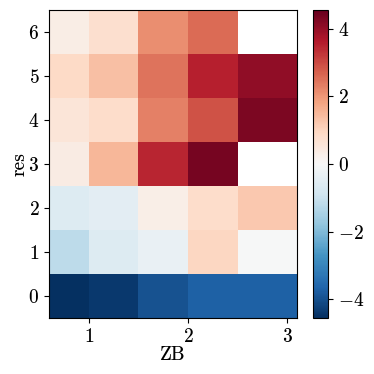

In [318]:
generalization_error('ZB-Reynolds', fun=error_KE).plot()

In [27]:
def plot_generalization(kind='ssh', models=['ZB-clean', 'ZB-ssd-5', 'ZB-Smooth', 'ZB-Reynolds'], labels=['ZB', 'ZB-Ssd', 'ZB-Smooth', 'ZB-Reynolds'], nottransparent=None):
    if kind =='ssh':
        fun = error_ssh
        def yaxis():
            plt.yticks(np.arange(0,0.50,0.05))
            plt.ylim([0,0.5])
        def ylabel():
            plt.ylabel('RMSE in \ntime-mean SSH, $m$')
    elif kind =='ssh_std':
        fun = error_ssh_std
        def yaxis():
            plt.yticks(np.arange(0,0.50,0.05))
            plt.ylim([0,0.25])
        def ylabel():
            plt.ylabel('RMSE in \nstd of SSH, $m$')
    elif kind=='total-energy':
        fun = error_total_energy
        def yaxis():
            plt.yticks(np.arange(0,90,5))
            plt.ylim([0,80])
        def ylabel():
            plt.ylabel('Error in \nEKE, MKE, EPE and MPE in $PJ$', fontsize=20)
            
    elif kind=='potential-energy':
        fun = error_potential_energy
        def yaxis():
            plt.yticks(np.arange(-5,80,5))
            plt.ylim([-1,70])
        def ylabel():
            plt.ylabel('Error in \nEPE and MPE in $PJ$', fontsize=20)

    elif kind=='kinetic-energy':
        fun = error_energy
        def yaxis():
            plt.yticks(np.arange(0,16,1))
            plt.ylim([0,16])
        def ylabel():
            plt.ylabel('Error in \nEKE, MKE, $PJ$')
            
    elif kind=='eddy-energy':
        fun = error_eddy_energy
        def yaxis():
            plt.yticks(np.arange(0,32,2))
            plt.ylim([0,30])
        def ylabel():
            plt.ylabel('Error in eddy energy (EKE, EPE), $PJ$')
            
    elif kind=='mean-energy':
        fun = error_mean_energy
        def yaxis():
            plt.yticks(np.arange(-5,80,5))
            plt.ylim([-1,70])
        def ylabel():
            plt.ylabel('Error in mean energy (MKE, MPE), $PJ$')

    
    default_rcParams()
    bare = [fun(conf,f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']]
    error = {}
    for model in models:
        error[model] = generalization_error(model, fun=fun)

    import matplotlib.colors as mcolors
    plt.figure(figsize=(12,6))
    
    for col, model in enumerate(models):
        plt.subplot(1,len(models),col+1)
        e = error[model]
        for ZB in e.ZB:
            if nottransparent is None:
                alpha = 1
                zorder=None
            else:
                if nottransparent[model] == ZB:
                    alpha = 1
                    zorder = 1000
                else:
                    alpha = 0.5
                    zorder = None
                        
            e.sel(ZB=ZB).plot(label=float(ZB), marker='o', markersize=10, alpha=alpha, zorder=zorder)
                
        plt.plot(bare, color='k', marker='o')
        plt.xticks([0,1,2,3,4,5,6], ['$1/2^o$', '$1/3^o$', '$1/4^o$', '$1/5^o$', '$1/6^o$', '$1/7^o$', '$1/8^o$'],rotation=50)
        if col==0:
            ylabel()
        yaxis()
        plt.grid()
        plt.legend(title='$\gamma=\\frac{-\kappa_{BC}}{\Delta_x ~ \Delta_y}$', fontsize=14)
        plt.title(labels[col])
        plt.xlabel('')
        if col==0:
            if kind == 'total-energy':
                plt.gca().annotate('Unparameterized', xy=(2, 35), xytext=(1, 45),
                arrowprops=dict(facecolor='black', shrink=0.05))
            elif kind == 'potential-energy':
                plt.gca().annotate('Unparameterized', xy=(2, 25), xytext=(1, 35),
                arrowprops=dict(facecolor='black', shrink=0.05))


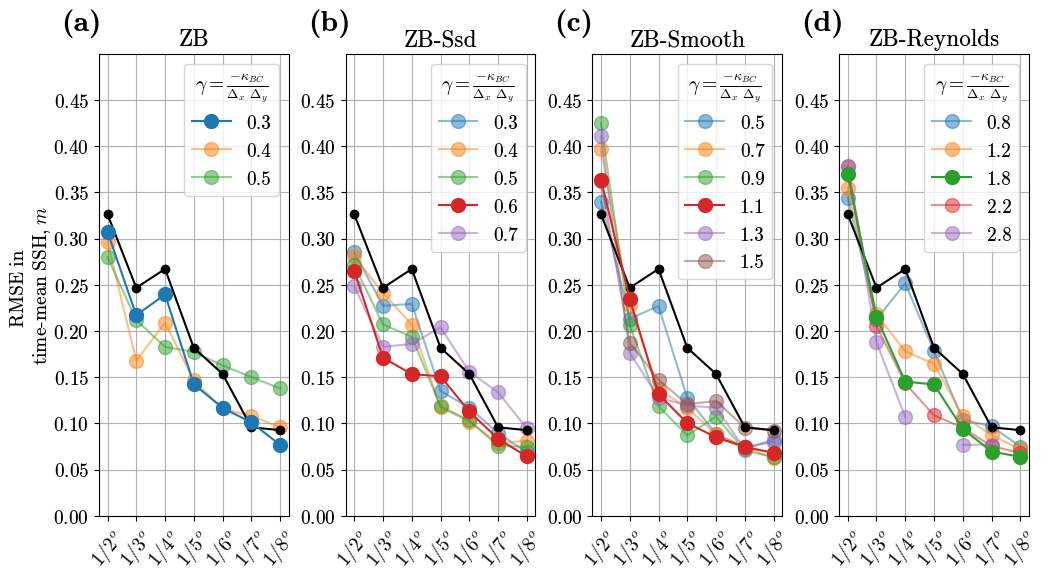

In [28]:
plot_generalization(kind='ssh', nottransparent={'ZB-clean':0.3, 'ZB-ssd-5':0.6, 'ZB-Smooth': 1.1, 'ZB-Reynolds': 1.8})
set_letters(fontsize=20)
#plt.savefig('Paper-Figures/generalization.pdf')

# New simpler metrics

In [176]:
def plot_metric_variable_ZB(model='ZB-clean', fun=error_KE, ZBs=None, main_line=True):
    if main_line:
        bare = [fun(conf,f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']]
    error = generalization_error(model, fun=fun)
    
    if ZBs is None:
        if model == 'ZB-Smooth':
            ZBs = [0.9, 1.1, 1.3]
        elif model == 'ZB-Reynolds':
            ZBs = [1.2, 1.8, 2.2]
        elif model == 'ZB-Smooth-2':
            ZBs = [0.9, 1.1, 1.3]
        elif model == 'ZB-Reynolds-2':
            ZBs = [1.2, 1.8, 2.2]
        else:
            ZBs = error.ZB
    
    colors = ['tab:blue', 'tab:red', 'tab:green'] + [None]*10
    
    ls = '-' if main_line else '--'
    alpha = 1 if main_line else 0.5
    lines = [''] * len(ZBs)
    for j, ZB in enumerate(ZBs):
        lines[j] = error.sel(ZB=ZB).plot(label=float(ZB), marker='o', markersize=10, color=colors[j], ls=ls, alpha=alpha)
    
    if main_line:
        plt.plot(bare, color='k', marker='o')
        plt.xticks([0,1,2,3,4,5,6], ['$1/2^o$', '$1/3^o$', '$1/4^o$', '$1/5^o$', '$1/6^o$', '$1/7^o$', '$1/8^o$'],rotation=50)
        plt.xlabel('')
        plt.grid()
        plt.title('')
    return lines
    

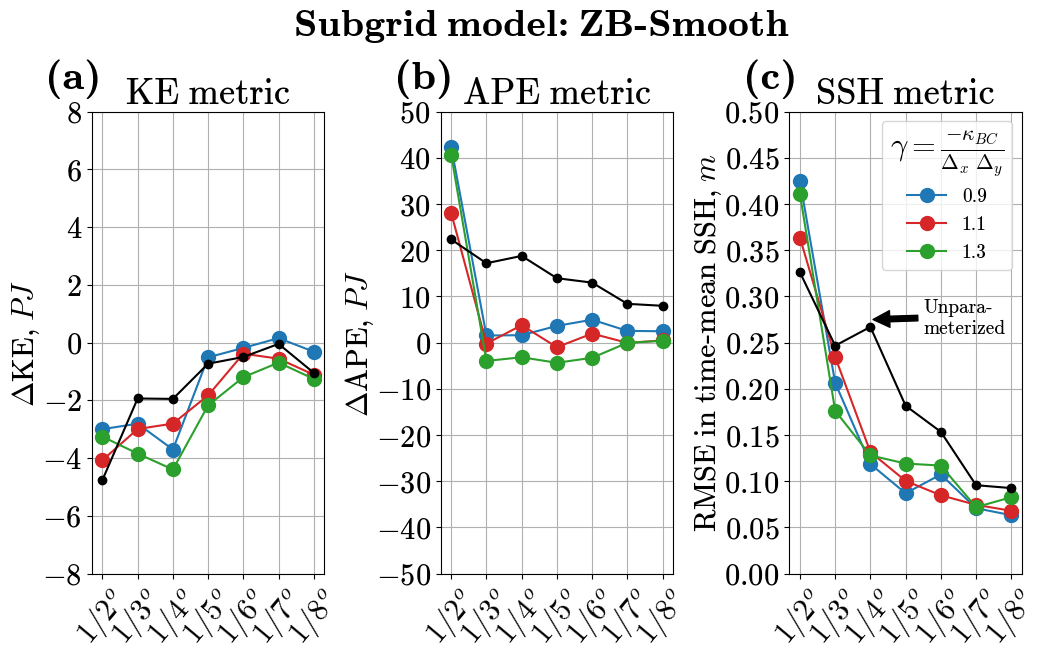

In [46]:
default_rcParams({'font.size': 22, 'figure.subplot.wspace': 0.5})
for model, title in zip(['ZB-clean', 'ZB-Smooth', 'ZB-Reynolds'], ['ZB', 'ZB-Smooth', 'ZB-Reynolds']):
    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1)
    plot_metric_variable_ZB(model=model, fun=error_KE)
    plt.ylabel('$\Delta$KE, $PJ$')
    plt.title('KE metric')
    plt.ylim([-8,8])
    plt.yticks(np.arange(-8,10,2))
    plt.subplot(1,3,2)
    plot_metric_variable_ZB(model=model, fun=error_APE)
    plt.ylabel('$\Delta$APE, $PJ$')
    plt.title('APE metric')
    plt.ylim([-50,50])
    plt.yticks(np.arange(-50,60,10))
    plt.subplot(1,3,3)
    plot_metric_variable_ZB(model=model, fun=error_ssh)
    plt.ylabel('RMSE in time-mean SSH, $m$')
    plt.title('SSH metric')
    plt.ylim([0,0.5])
    plt.yticks(np.arange(0,0.55,0.05))
    plt.legend(title='$\gamma=\\frac{-\kappa_{BC}}{\Delta_x ~ \Delta_y}$', fontsize=14)
    plt.suptitle(f'Subgrid model: {title}', y=1.05, fontweight='bold')
    plt.gca().annotate('Unpara-\nmeterized', xy=(2, 0.275), xytext=(3.5, 0.26),
        arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)
    set_letters(fontsize=28)
#    plt.savefig(f'Paper-Figures/Metrics-{title}.pdf')

# Transposed figures

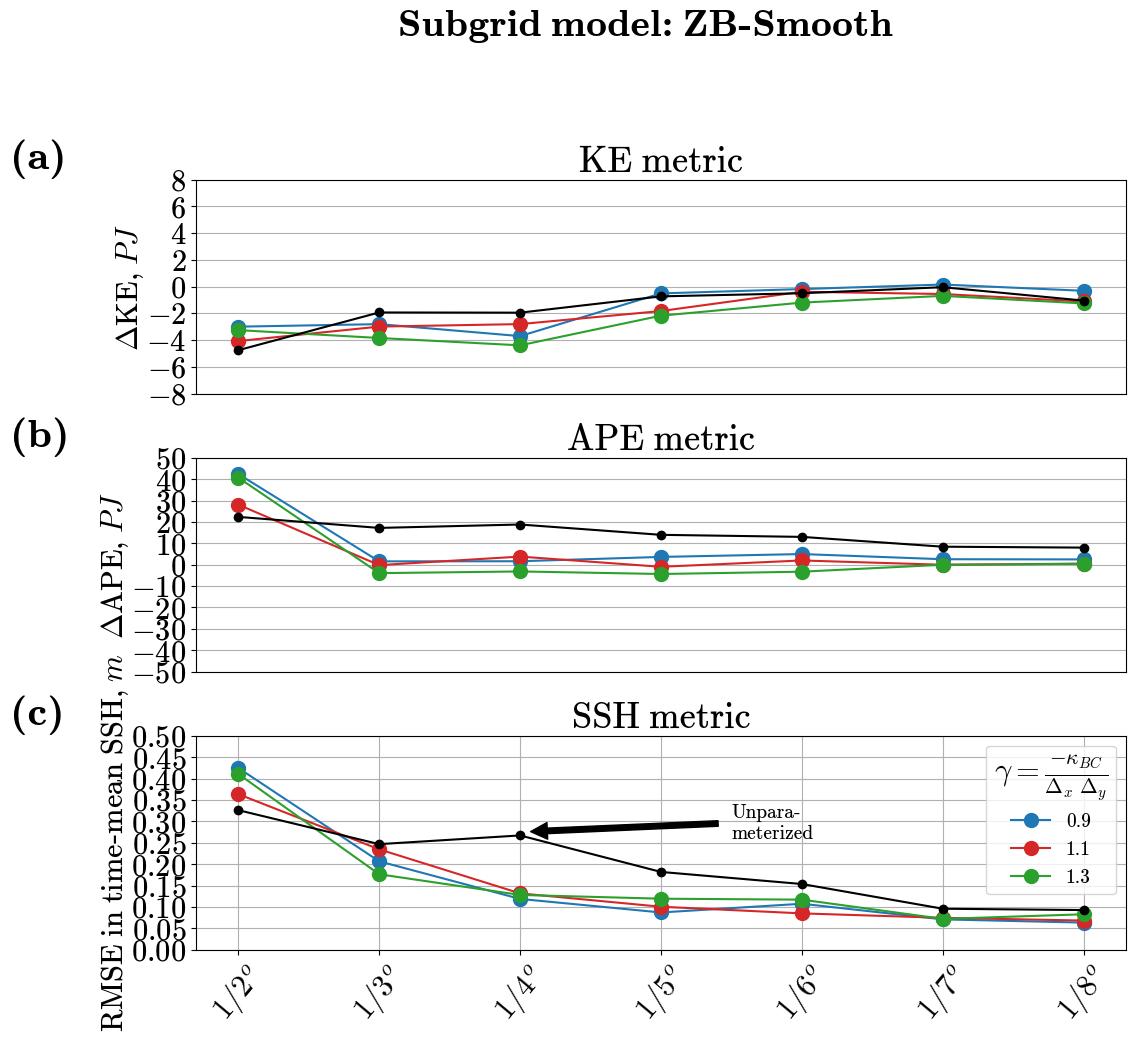

In [181]:
default_rcParams({'font.size': 22, 'figure.subplot.wspace': 0.5})
for model, title in zip(['ZB-Smooth'], ['ZB-Smooth']):
    plt.figure(figsize=(12,10))
    plt.subplot(3,1,1)
    plot_metric_variable_ZB(model=model, fun=error_KE)
    plt.xlabel('')
    plt.xticks([])
    plt.ylabel('$\Delta$KE, $PJ$')
    plt.title('KE metric')
    plt.ylim([-8,8])
    plt.yticks(np.arange(-8,10,2))
    plt.subplot(3,1,2)
    plot_metric_variable_ZB(model=model, fun=error_APE)
    plt.xlabel('')
    plt.xticks([])
    plt.ylabel('$\Delta$APE, $PJ$')
    plt.title('APE metric')
    plt.ylim([-50,50])
    plt.yticks(np.arange(-50,60,10))
    plt.subplot(3,1,3)
    plot_metric_variable_ZB(model=model, fun=error_ssh)
    plt.ylabel('RMSE in time-mean SSH, $m$')
    plt.title('SSH metric')
    plt.ylim([0,0.5])
    plt.yticks(np.arange(0,0.55,0.05))
    plt.legend(title='$\gamma=\\frac{-\kappa_{BC}}{\Delta_x ~ \Delta_y}$', fontsize=14)
    plt.suptitle(f'Subgrid model: {title}', y=1.05, fontweight='bold')
    plt.gca().annotate('Unpara-\nmeterized', xy=(2, 0.275), xytext=(3.5, 0.26),
        arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)
    set_letters(fontsize=28)
#    plt.savefig(f'Paper-Figures/Metrics-{title}.pdf')

# Sensitivity for Appendix

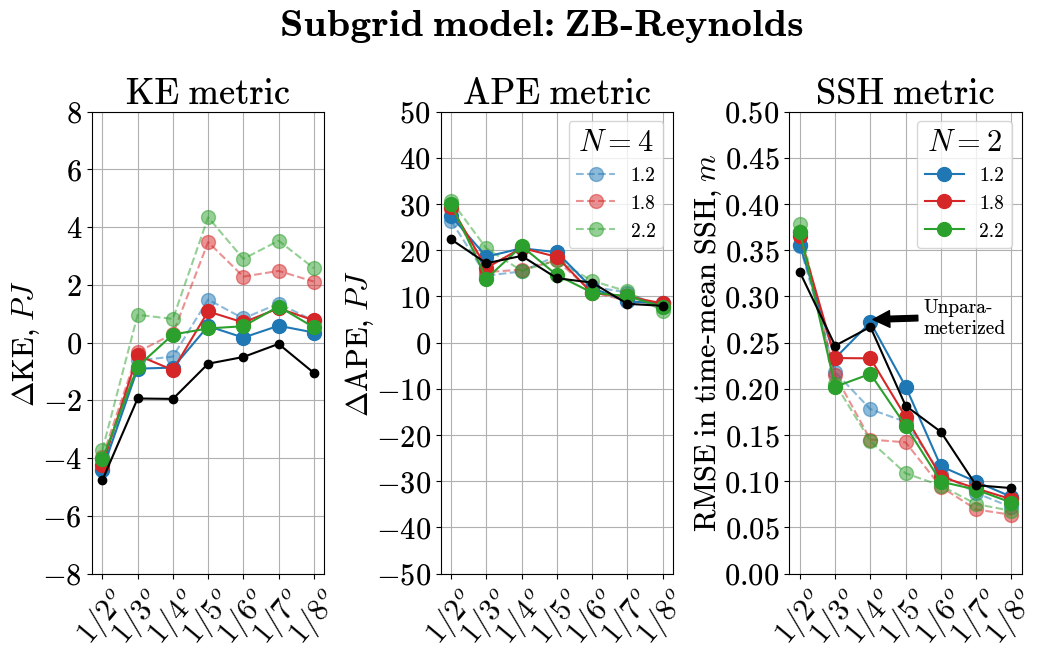

In [104]:
default_rcParams({'font.size': 22, 'figure.subplot.wspace': 0.5})
for model, title in zip(['ZB-Smooth', 'ZB-Reynolds'], ['ZB-Smooth', 'ZB-Reynolds']):
    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1)
    
    plot_metric_variable_ZB(model=model, fun=error_KE, main_line=False)
    plot_metric_variable_ZB(model=model+'-2', fun=error_KE, main_line=True)
    
    plt.ylabel('$\Delta$KE, $PJ$')
    plt.title('KE metric')
    plt.ylim([-8,8])
    plt.yticks(np.arange(-8,10,2))
    plt.subplot(1,3,2)
    
    plot_metric_variable_ZB(model=model, fun=error_APE, main_line=False)
    plt.legend(title='$N=4$', fontsize=14)
    plot_metric_variable_ZB(model=model+'-2', fun=error_APE, main_line=True)
    
    plt.ylabel('$\Delta$APE, $PJ$')
    plt.title('APE metric')
    plt.ylim([-50,50])
    plt.yticks(np.arange(-50,60,10))
    plt.subplot(1,3,3)
    
    plot_metric_variable_ZB(model=model, fun=error_ssh, main_line=False)
    lines = plot_metric_variable_ZB(model=model+'-2', fun=error_ssh, main_line=True)
    plt.gca().legend(handles=[line[0] for line in lines], title='$N=2$', fontsize=14)
    
    plt.ylabel('RMSE in time-mean SSH, $m$')
    plt.title('SSH metric')
    plt.ylim([0,0.5])
    plt.yticks(np.arange(0,0.55,0.05))
    plt.suptitle(f'Subgrid model: {title}', y=1.05, fontweight='bold')
    plt.gca().annotate('Unpara-\nmeterized', xy=(2, 0.275), xytext=(3.5, 0.26),
        arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)
    #set_letters(fontsize=28)
    
    plt.savefig(f'Paper-Figures/Sensitivity-N-{title}.pdf')

# Comparison to JH and GZ

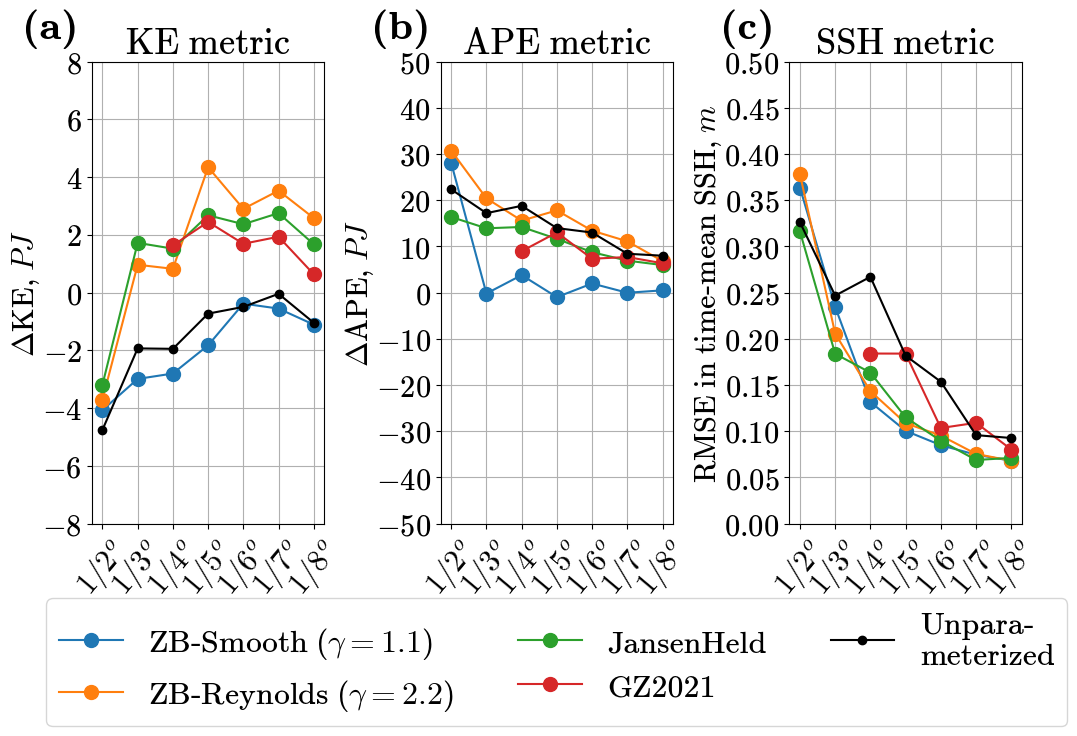

In [32]:
default_rcParams({'font.size': 22, 'figure.subplot.wspace': 0.5})
plt.figure(figsize=(12,6))

for col, fun in enumerate([error_KE, error_APE, error_ssh]):
    plt.subplot(1,3,col+1)
    error = {}
    error['bare'] = [fun(conf,f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']]
    error['ZB-Smooth'] = [fun(f'ZB-Smooth-{conf}-ZB-1.1', f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']]
    error['ZB-Reynolds'] = [fun(f'ZB-Reynolds-{conf}-ZB-2.2', f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']]
    error['Jansen-Held'] = [fun(f'Jansen-Held-{conf}-ref', f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']]
    error['GZ'] = [np.nan, np.nan] + [fun(f'GZ21-{conf}', f'R64_{conf}') for conf in ['R4', 'R5', 'R6', 'R7', 'R8']]
    
    
    plt.plot(error['ZB-Smooth'], marker='o', markersize=10, label='ZB-Smooth ($\gamma=1.1$)')
    plt.plot(error['ZB-Reynolds'], marker='o', markersize=10, label='ZB-Reynolds ($\gamma=2.2$)')
    plt.plot(error['Jansen-Held'], marker='o', markersize=10, label='JansenHeld')
    plt.plot(error['GZ'], marker='o', markersize=10, label='GZ2021')
    plt.plot(error['bare'], color='k', marker='o', label='Unpara-\nmeterized')
    
    plt.ylim([0,None])
    plt.xticks([0,1,2,3,4,5,6], ['$1/2^o$', '$1/3^o$', '$1/4^o$', '$1/5^o$', '$1/6^o$', '$1/7^o$', '$1/8^o$'],rotation=50)    
    plt.grid()
    
    if fun == error_KE:
        plt.ylabel('$\Delta$KE, $PJ$')
        plt.title('KE metric')
        plt.ylim([-8,8])
        plt.yticks(np.arange(-8,10,2))
    if fun == error_APE:
        plt.ylabel('$\Delta$APE, $PJ$')
        plt.title('APE metric')
        plt.ylim([-50,50])
        plt.yticks(np.arange(-50,60,10))
    if fun == error_ssh:
        plt.ylabel('RMSE in time-mean SSH, $m$')
        plt.title('SSH metric')
        plt.ylim([0,0.5])
        plt.yticks(np.arange(0,0.55,0.05))
    
    if col==0:
        plt.legend(loc='center', bbox_to_anchor=(2,-0.3), ncol=3, fontsize=23)
set_letters(fontsize=28, x=-0.3)
plt.savefig('Paper-Figures/generalization_JH_GZ.pdf')

# Spectrum

In [398]:
def plot_spectrum(exps=[],zl=0, colors=[None]*7+['k'], lws=[1.5]*8, lss=['-']*8, labels=['$1/2^o$', '$1/3^o$', '$1/4^o$', '$1/5^o$', '$1/6^o$', '$1/7^o$', '$1/8^o$', 'High \nres.']):
    for exp,label,color,lw,ls in zip(exps,labels,colors,lws,lss):
        ds[exp].EKE_spectrum.isel(zl=zl).plot(label=label,color=color,lw=lw,ls=ls)
    plt.xlabel(r'wavenumber, $m^{-1}$')
    plt.ylabel('EKE spectrum, $m^3/s^2$')
    if zl==0:
        k = [5e-5, 5e-4]
        E = [1.5e+2, 0]
        plt.text(1.5e-4,2e+1,'$k^{-3}$')
    else:
        k = [5e-5, 5e-4]
        E = [3e+1, 0]
        plt.text(1.5e-4,2e0,'$k^{-3}$')
    E[1] = E[0] * (k[1]/k[0])**(-3)
    plt.loglog(k,E,'--k')
    plt.title('')
    plt.ylim([1e-5,1e+3])
    plt.xlim([None,1e-3])
    plt.yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e+1,1e+2, 1e+3])
    Rd1 = 30000
    Rd2 = 15000
    plt.axvspan(1/Rd1, 1/Rd2, color='tab:blue', alpha=0.1, lw=0)


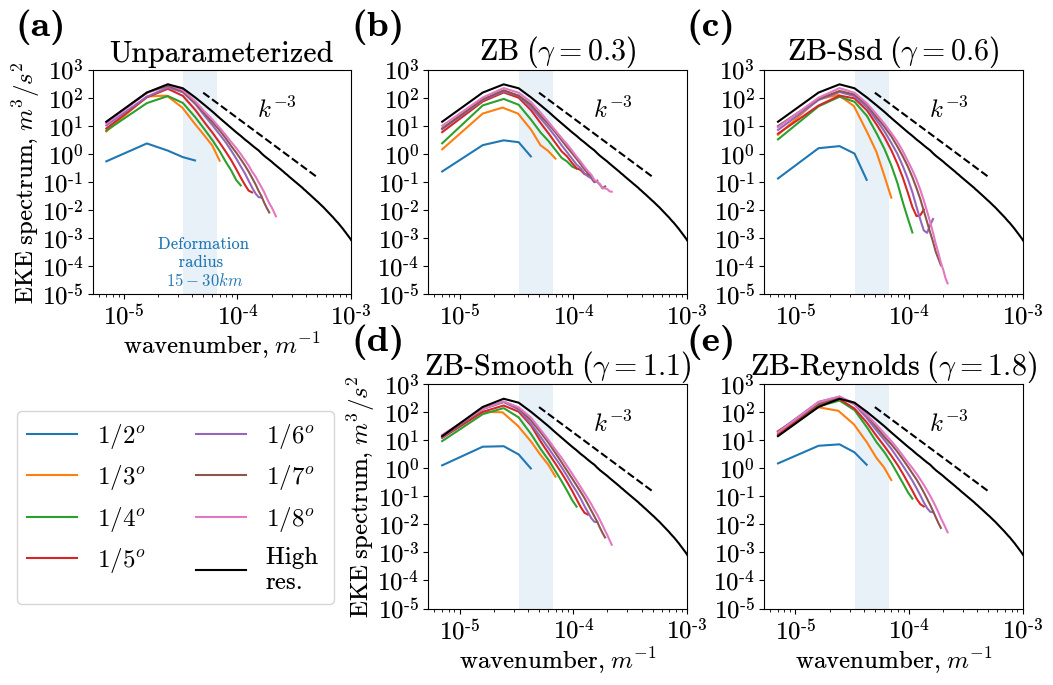

In [409]:
default_rcParams({'figure.subplot.hspace': 0.4, 'font.size': 18})

plt.figure(figsize=(12,7))
plt.subplot(2,3,1)
plot_spectrum([f'R{n}' for n in range(2,9)]+['R64'])
plt.legend(ncol=2, loc='center', bbox_to_anchor=(0.32,-0.95))
plt.text(2e-5,2e-5,'Deformation \n     radius \n  $15-30km$', fontsize=12, color='tab:blue')
plt.title('Unparameterized')

plt.subplot(2,3,2)
plot_spectrum([f'ZB-clean-R{n}-ZB-0.3' for n in range(2,9)]+['R64'])
plt.xlabel(''); plt.ylabel('')
plt.title('ZB ($\gamma=0.3$)')

plt.subplot(2,3,3)
plot_spectrum([f'ZB-ssd-5-R{n}-ZB-0.6' for n in range(2,9)]+['R64'])
plt.xlabel(''); plt.ylabel('')
plt.title('ZB-Ssd ($\gamma=0.6$)')

plt.subplot(2,3,5)
plot_spectrum([f'ZB-Smooth-R{n}-ZB-1.1' for n in range(2,9)]+['R64'])
plt.title('ZB-Smooth ($\gamma=1.1$)')

plt.subplot(2,3,6)
plot_spectrum([f'ZB-Reynolds-R{n}-ZB-1.8' for n in range(2,9)]+['R64'])
plt.ylabel('')
plt.title('ZB-Reynolds ($\gamma=1.8$)')

set_letters(fontsize=25, y=1.15, x=-0.3)

plt.savefig('Paper-Figures/Spectrum-generalization.pdf')

# Sensitivity to the Smagorinsky coefficient

In [13]:
def error_ssh(exp):
    return Lk_error(ds[exp].ssh_mean,ds['R64_R4'].ssh_mean)[0]

In [14]:
def error_ssh_std(exp):
    return Lk_error(ds[exp].ssh_std,ds['R64_R4'].ssh_std)[0]

In [15]:
def error_spectrum(exp):
    return Lk_error(ds[exp].EKE_spectrum, ds['R64_R4'].EKE_spectrum)[0]

In [16]:
def error_spectrum_large(exp):
    return Lk_error(ds[exp].EKE_spectrum[:,0:3], ds['R64_R4'].EKE_spectrum[:,0:3])[0]

In [17]:
def error_energy(exp):
    return sum(ds[exp].Lk_error(ds['R64_R4'], features=['EKE_joul', 'MKE_joul'], normalize=False)[0]) * 1e-15

In [18]:
def error_total_energy(exp):
    return sum(ds[exp].Lk_error(ds['R64_R4'], features=['EKE_joul', 'MKE_joul', 'EPE_joul', 'MPE_joul', 'EPE_ssh', 'MPE_ssh'], normalize=False)[0]) * 1e-15

In [19]:
def error_2d(error_function = error_ssh, prefix='ZB-clean'):
    ZBs = sorted([float(exp.split('-')[-1]) for exp in ds.exps if f'{prefix}-Cs-0.03' in exp])
    Css = sorted(set([float(exp.split('-')[-3]) for exp in ds.exps if f'{prefix}-Cs-' in exp]))
    
    error = np.zeros((len(ZBs), len(Css)))
    for i, Cs in enumerate(Css):
        for j, ZB in enumerate(ZBs):
            try:
                error[j,i] = error_function(f'{prefix}-Cs-{Cs:.2f}-ZB-{ZB}')
            except:
                error[j,i] = np.nan
    error = xr.DataArray(error, dims=['ZB', 'Cs'], coords={'Cs': Css, 'ZB': ZBs})
    return error

In [20]:
ssh = {'v0': 0.26709399, 'vmin': 0.0, 'error_function': error_ssh, 
           'cbar_ticks': np.arange(0.0,0.7,0.05), 
           'cbar_extend': 'neither', 'cbar_label': 'RMSE in \ntime-mean SSH, $m$'};
ssh_std = {'v0': 0.086690746, 'vmin': 0.0, 'error_function': error_ssh_std, 
           'cbar_ticks': np.arange(0,0.2,0.02), 
           'cbar_extend': 'max', 'cbar_label': 'RMSE in \nstandard deviation of SSH, $m$'};
sp = {'v0': 64.31411662832397, 'vmin': 0.0, 'error_function': error_spectrum, 
            'cbar_ticks': np.arange(0,140,10), 
            'cbar_extend': 'neither', 'cbar_label': 'RMSE in \nEKE spectrum, $m^3/s^2$'};

sp_large = {'v0': 99.26127116294647, 'vmin': 0.0, 'error_function': error_spectrum_large, 
            'cbar_ticks': np.arange(0,200,10), 
            'cbar_extend': 'neither', 'cbar_label': 'RMSE in \nEKE spectrum, $m^3/s^2$'};

energy = {'v0': 9.1115783207157, 'vmin': 0.0, 'error_function': error_energy, 
          'cbar_ticks': np.arange(0,20),
          'cbar_extend': 'neither', 'cbar_label': 'Error in \nEKE and MKE, $PJ$'}

tot_energy = {'v0': 34.13488452735518, 'vmin': 0.0, 'error_function': error_total_energy, 
          'cbar_ticks': np.arange(0,80,5),
          'cbar_extend': 'neither', 'cbar_label': 'Error in \nEKE, MKE, EPE and MPE in $PJ$'}

In [21]:
def constrain_optimization(e):
    #shape of e is ZB x Cs
    ee = e.copy()
    for j in range(e.shape[1]):
        for i in range(e.shape[0]):
            if np.isnan(e[i,j]):
                ee[i:,j] = np.nan
    return ee    

In [22]:
def plot_panels(exps, labels, v0, vmin, error_function, color='w', cbar_ticks=None, cbar_extend='none', cbar_label=''):
    default_rcParams({'axes.formatter.limits': (-3,3)})
    fig = plt.figure(figsize=(3*len(exps),4))
    vspread = v0-vmin
    vmax = v0+vspread

    for col in range(len(exps)):
        label=labels[col]
        exp=exps[col]
        plt.subplot(1,len(exps),col+1)
        e = error_2d(error_function = error_function, prefix=exp)
        X,Y = np.meshgrid(e.Cs, e.ZB)
        em = np.ma.masked_invalid(e)
        im = plt.pcolor(X,Y,em,vmin=vmin,vmax=vmax,cmap='RdBu_r')
        # https://stackoverflow.com/questions/35905393/python-leave-numpy-nan-values-from-matplotlib-heatmap-and-its-legend
        plt.gca().patch.set(hatch='OO', edgecolor='black')
        
        #im = e.plot(cmap='RdBu_r', add_colorbar=False, vmin=vmin, vmax=vmax)
        cb = plt.colorbar(im, fraction=0.3, pad=0.05, aspect=15, ticks=cbar_ticks, extend=cbar_extend)
        cb.set_label(cbar_label, fontsize=16, labelpad=10)
        if col<len(exps)-1:
            cb.ax.set_yticklabels(['']*len(cbar_ticks))
            cb.set_label('')
            
        idx_opt = constrain_optimization(e).argmin(dim='ZB')
        if len(e.Cs) == 3:
            markers = ['v', 'o', 's']
        else:
            markers = ['*', 'v', 'o', 's']
        
        for marker, Cs in zip(markers,idx_opt.Cs):
            idx = idx_opt.sel(Cs=Cs)
            plt.plot(Cs,e.ZB[idx], marker=marker, markeredgecolor=color, markerfacecolor='none', markersize=10, markeredgewidth=2, clip_on=False)
            cb.ax.plot(0.5,e.sel(Cs=Cs).isel(ZB=idx),marker=marker,markeredgecolor=color, markerfacecolor='none', markersize=10, markeredgewidth=2)
            plt.plot(Cs,0,marker=marker,markeredgecolor='k', markerfacecolor='none', markersize=7, markeredgewidth=1, clip_on=False)
            cb.ax.plot(0.5,e.sel(ZB=0.0,Cs=Cs),marker=marker,markeredgecolor='k', markerfacecolor='none', markersize=7, markeredgewidth=1)
        
#         for Cs in e.Cs:
#             for ZB in e.ZB:
#                 if np.isnan(e.sel(Cs=Cs,ZB=ZB)):
#                     plt.plot(Cs,ZB,marker='*',color='k')

        plt.xticks(e.Cs.values, rotation=60)
        if len(e.ZB) > 16:
            plt.yticks(e.ZB.values[::2])
        else:
            plt.yticks(e.ZB.values)
            
        plt.xlabel('')
        if col==0:
            plt.ylabel('ZB scaling coefficient, $\gamma$', fontsize=20)
        else:
            plt.ylabel('')
        plt.title(label)
    fig.text(0.5, -0.1, 'Smagorinsky coefficient $C_S$', ha='center', fontsize=20)
    

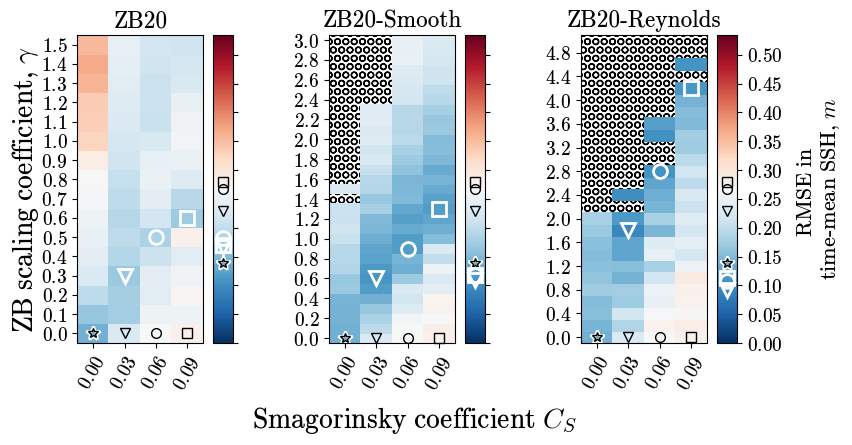

In [23]:
plot_panels(['ZB-clean', 'ZB-stress-pass-4-sel-1', 'ZB-Reynolds-pass-4-pass-4'], ['ZB20','ZB20-Smooth', 'ZB20-Reynolds'], **ssh)
plt.savefig('Paper-Figures/sensitivity-Cs-update-20.pdf')

# Role of viscosity on energy spectrum

In [241]:
def plot_spectrum(zl=0):
    for exp,label,color,lw,ls in zip(exps,labels,colors,lws,lss):
        ds[exp].EKE_spectrum.isel(zl=zl).plot(label=label,color=color,lw=lw,ls=ls)
    plt.xlabel(r'wavenumber, $m^{-1}$')
    plt.ylabel('EKE spectrum, $m^3/s^2$')
    if zl==0:
        k = [5e-5, 5e-4]
        E = [1.5e+2, 0]
        plt.text(1.5e-4,2e+1,'$k^{-3}$')
    else:
        k = [5e-5, 5e-4]
        E = [3e+1, 0]
        plt.text(1.5e-4,2e0,'$k^{-3}$')
    E[1] = E[0] * (k[1]/k[0])**(-3)
    plt.loglog(k,E,'--k')
    plt.title('')
    plt.ylim([1e-5,1e+3])
    plt.xlim([None,1e-3])

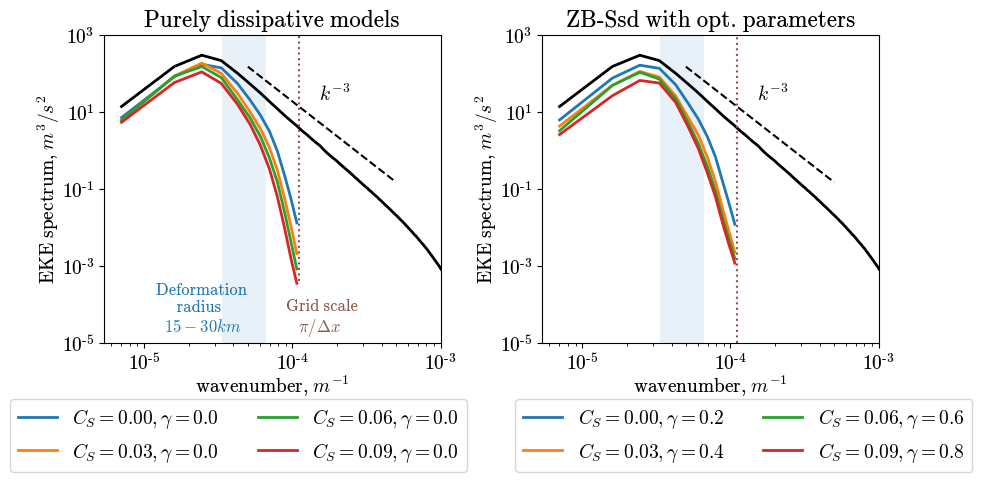

In [269]:
default_rcParams({'font.size':14})
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
exps = ['ZB-ssd-5-Cs-0.00-ZB-0.0', 'ZB-ssd-5-Cs-0.03-ZB-0.0', 'ZB-ssd-5-Cs-0.06-ZB-0.0', 'ZB-ssd-5-Cs-0.09-ZB-0.0', hires]
labels=['$C_S=0.00, \gamma=0.0$','$C_S=0.03, \gamma=0.0$','$C_S=0.06, \gamma=0.0$', '$C_S=0.09, \gamma=0.0$', None]
colors = ['tab:blue'] + ['tab:orange'] + ['tab:green'] + ['tab:red'] + ['k']
lws = [2]*5
lss = ['-']*5
plot_spectrum()
plt.legend(ncol=2, bbox_to_anchor=(0.4,-0.3), loc='center')
# Baroclinic deformation radius
Rd1 = 30000
Rd2 = 15000
plt.axvspan(1/Rd1, 1/Rd2, color='tab:blue', alpha=0.1, lw=0)
plt.text(1.2e-5,2e-5,'Deformation \n     radius \n  $15-30km$', fontsize=12, color='tab:blue')
plt.axvline(x=1.1e-4, ls=':', color='tab:brown', ymin=0.2)
plt.text(0.9e-4, 0.2e-4, 'Grid scale\n   $\\pi/\\Delta x$', fontsize=12, color='tab:brown')
plt.title('Purely dissipative models')

plt.subplot(1,2,2)
exps = ['ZB-ssd-5-Cs-0.00-ZB-0.2', 'ZB-ssd-5-Cs-0.03-ZB-0.4', 'ZB-ssd-5-Cs-0.06-ZB-0.6', 'ZB-ssd-5-Cs-0.09-ZB-0.8', hires]
labels = ['$C_S=0.00, \gamma=0.2$', '$C_S=0.03, \gamma=0.4$', '$C_S=0.06, \gamma=0.6$', '$C_S=0.09, \gamma=0.8$', None]
plot_spectrum()
plt.legend(ncol=2, bbox_to_anchor=(0.6,-0.3), loc='center')
plt.axvspan(1/Rd1, 1/Rd2, color='tab:blue', alpha=0.1, lw=0)
plt.axvline(x=1.1e-4, ls=':', color='tab:brown', ymin=0.0)
plt.title('ZB-Ssd with opt. parameters')

plt.savefig('Paper-Figures/ZB-ssd-sensitivity-right.pdf')


In [275]:
plot_panels(['ZB-ssd-5'], ['Sensitivity \nfor ZB-Ssd'], **tot_energy)
plt.savefig('Paper-Figures/ZB-ssd-sensitivity-left.pdf')